# Predicting NBA Player Performance: A Neural Network Approach to Analyzing Seasonal Statistics

## Name
 - Shay Samat

## Preprocessing

In [1]:
#imports
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD

2024-03-10 11:57:10.888199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
nba2021reg_data = pd.read_csv("2021-2022 NBA Player Stats - Regular.csv", sep=';', encoding = 'latin1')
nba2021playoff_data = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", sep=';', encoding = 'latin1')

In [3]:
nba2021reg_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
nba2021playoff_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3


In [5]:
nba2022reg_data = pd.read_csv("2022-2023 NBA Player Stats - Regular.csv", sep=';', encoding = 'latin1')
nba2022playoff_data = pd.read_csv("2022-2023 NBA Player Stats - Playoffs.csv", sep=';', encoding = 'latin1')

In [6]:
nba2022reg_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [7]:
nba2022playoff_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,...,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,...,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,...,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4


In [8]:
nba2021reg_data.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [9]:
nba2022reg_data.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [10]:
def update_positions(position):
    if '-' in position:
        return position.split('-')[0]
    else:
        return position

# Apply the function to update player positions in the DataFrame
nba2021reg_data['Pos'] = nba2021reg_data['Pos'].apply(update_positions)
nba2022reg_data['Pos'] = nba2022reg_data['Pos'].apply(update_positions)

In [11]:
nba2021reg_data2= pd.get_dummies(nba2021reg_data, columns=['Tm', 'Pos'])
nba2022reg_data2= pd.get_dummies(nba2022reg_data, columns=['Tm', 'Pos'])

In [12]:
merged_data = pd.merge(nba2021reg_data2, nba2022reg_data2, on='Player', suffixes=('_2021', '_2022'))

In [13]:
merged_data

,Rk_2021,Player,Age_2021,G_2021,GS_2021,MP_2021,FG_2021,FGA_2021,FG%_2021,3P_2021,...,Tm_SAS_2022,Tm_TOR_2022,Tm_TOT_2022,Tm_UTA_2022,Tm_WAS_2022,Pos_C_2022,Pos_PF_2022,Pos_PG_2022,Pos_SF_2022,Pos_SG_2022
0,1,Precious Achiuwa,22,73,28,23.6,3.6,8.3,0.439,0.8,...,0,1,0,0,0,1,0,0,0,0
1,2,Steven Adams,28,76,75,26.3,2.8,5.1,0.547,0.0,...,0,0,0,0,0,1,0,0,0,0
2,3,Bam Adebayo,24,56,56,32.6,7.3,13.0,0.557,0.0,...,0,0,0,0,0,1,0,0,0,0
3,4,Santi Aldama,21,32,0,11.3,1.7,4.1,0.402,0.2,...,0,0,0,0,0,0,1,0,0,0
4,6,Nickeil Alexander-Walker,23,65,21,22.6,3.9,10.5,0.372,1.6,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,601,Thaddeus Young,33,26,0,18.3,2.6,5.5,0.465,0.7,...,0,1,0,0,0,0,1,0,0,0
713,602,Trae Young,23,76,76,34.9,9.4,20.3,0.460,3.1,...,0,0,0,0,0,0,0,1,0,0
714,603,Omer Yurtseven,23,56,12,12.6,2.3,4.4,0.526,0.0,...,0,0,0,0,0,1,0,0,0,0
715,604,Cody Zeller,29,27,0,13.1,1.9,3.3,0.567,0.0,...,0,0,0,0,0,1,0,0,0,0


# EDA

## 2021 Stats EDA

### Histogram of PPG

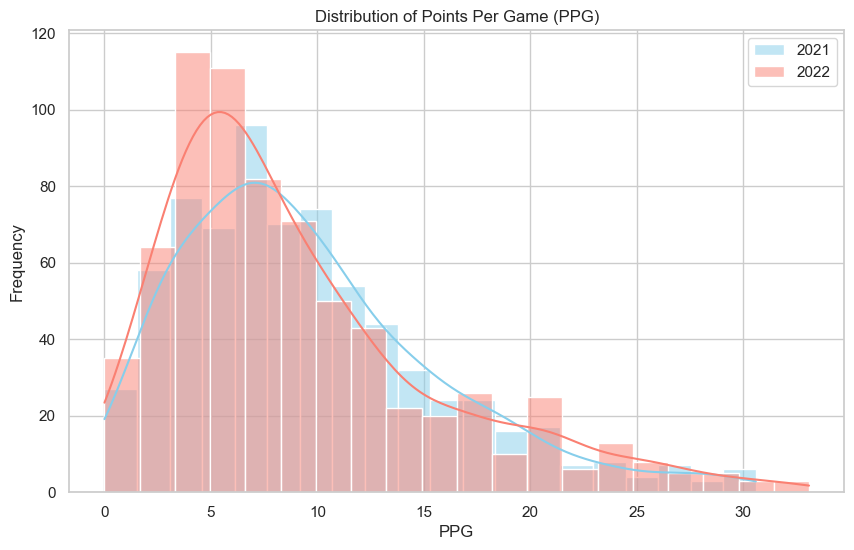

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='PTS_2021', bins=20, kde=True, color='skyblue', label='2021')
sns.histplot(data=merged_data, x='PTS_2022', bins=20, kde=True, color='salmon', label='2022')
plt.title('Distribution of Points Per Game (PPG)')
plt.xlabel('PPG')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Boxplot of PPG by Position

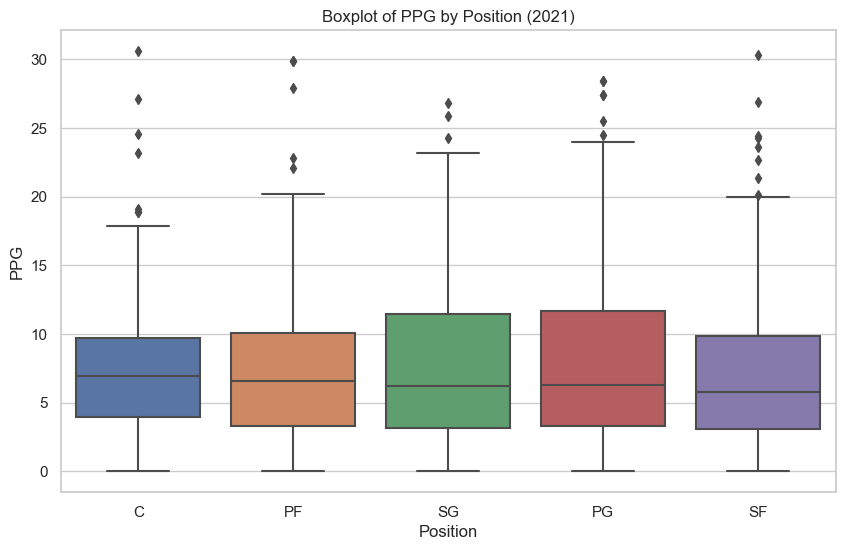

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba2021reg_data, x='Pos', y='PTS')
plt.title('Boxplot of PPG by Position (2021)')
plt.xlabel('Position')
plt.ylabel('PPG')
plt.show()

### Scatter Plot of PPG vs. Age

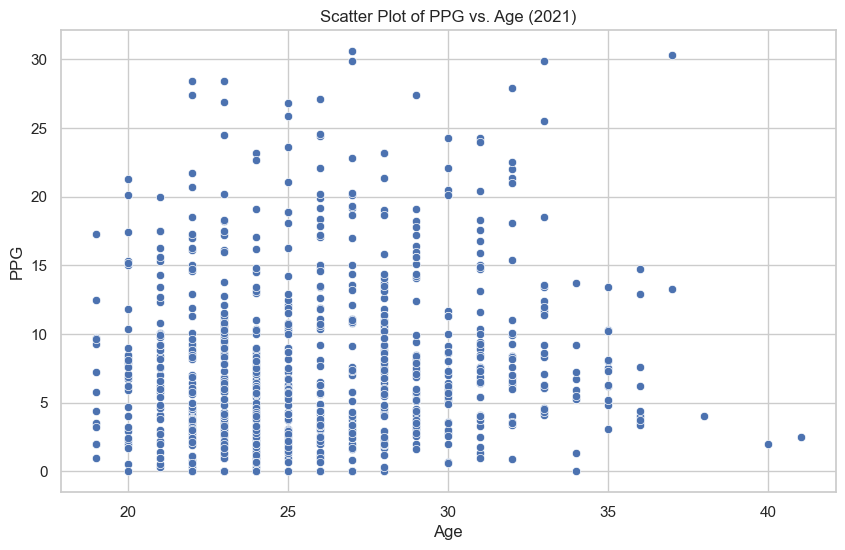

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba2021reg_data, x='Age', y='PTS')
plt.title('Scatter Plot of PPG vs. Age (2021)')
plt.xlabel('Age')
plt.ylabel('PPG')
plt.show()

### Pairplot of Selected Features

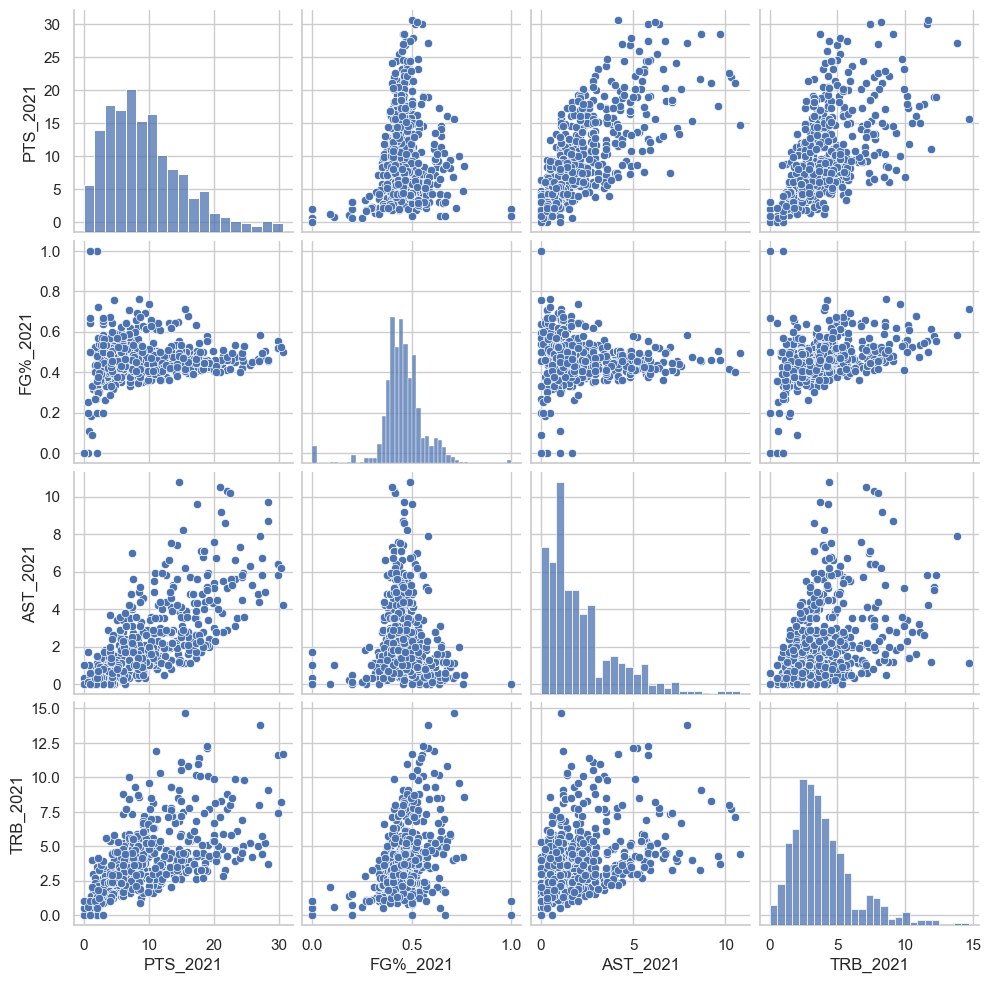

In [17]:

selected_features = ['PTS_2021', 'FG%_2021', 'AST_2021', 'TRB_2021']
sns.pairplot(merged_data[selected_features])
plt.show()

### Bar Plot of Average PPG by Team

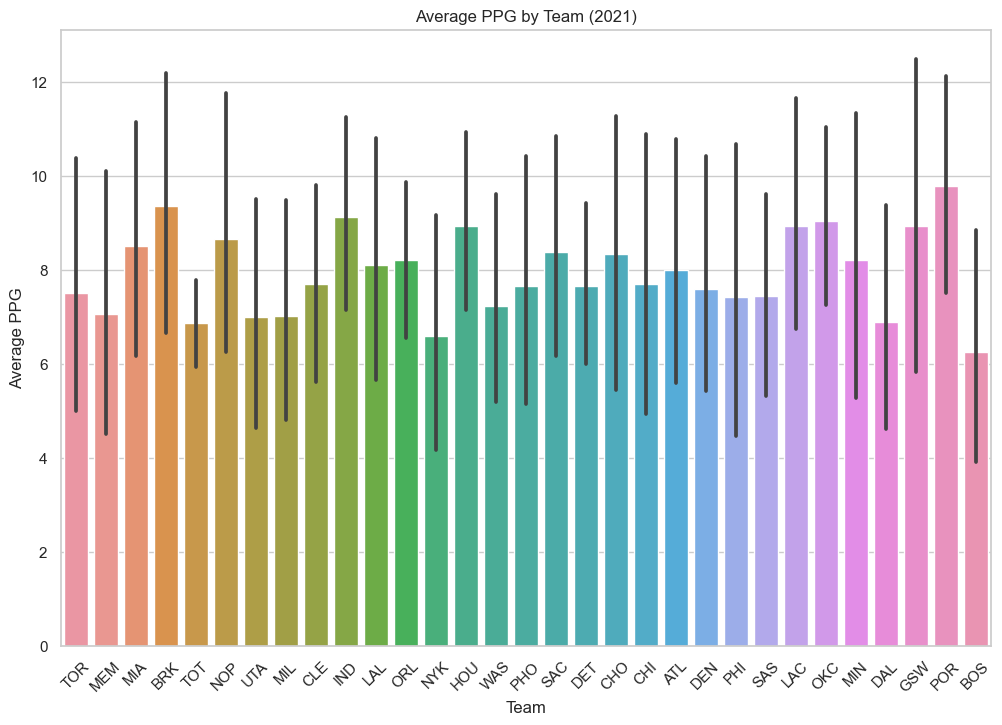

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=nba2021reg_data, x='Tm', y='PTS')
plt.title('Average PPG by Team (2021)')
plt.xlabel('Team')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()

### Line Plot of PPG Trend Over Games Played

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/2390462800.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_data, x='G_2021', y='PTS_2021', marker='o', ci=None)


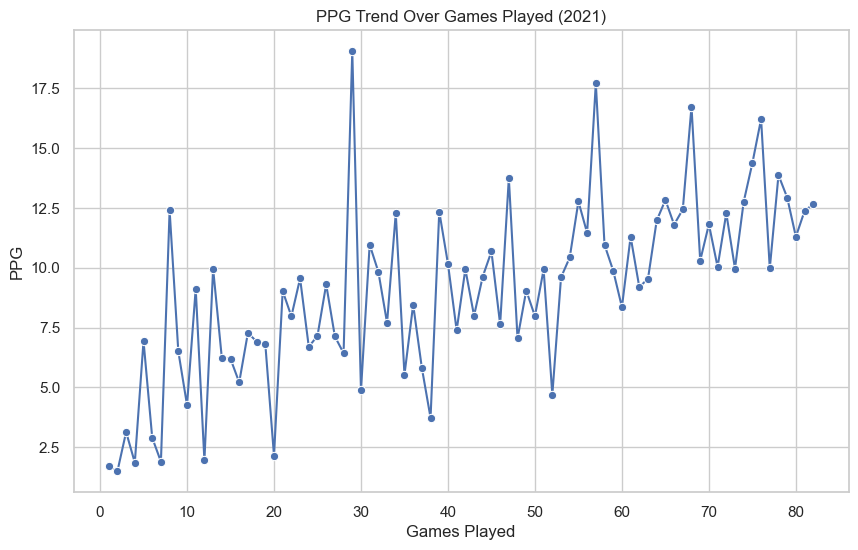

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='G_2021', y='PTS_2021', marker='o', ci=None)
plt.title('PPG Trend Over Games Played (2021)')
plt.xlabel('Games Played')
plt.ylabel('PPG')
plt.show()

### Distribution of Player Positions

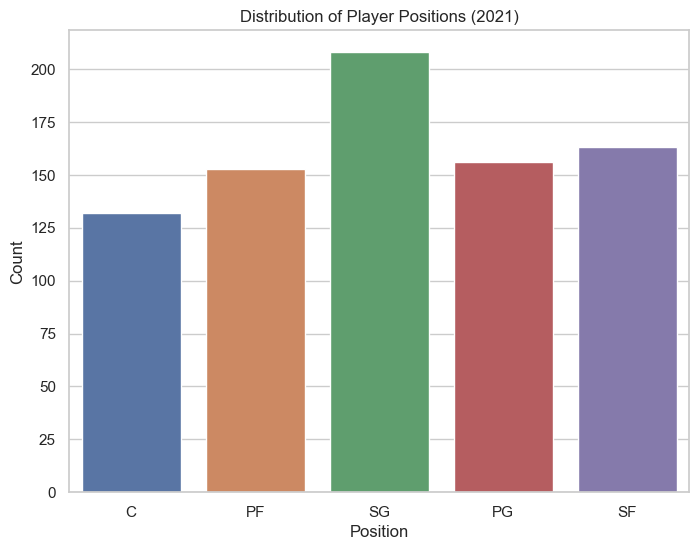

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=nba2021reg_data, x='Pos')
plt.title('Distribution of Player Positions (2021)')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

### Boxplot of PPG by Team

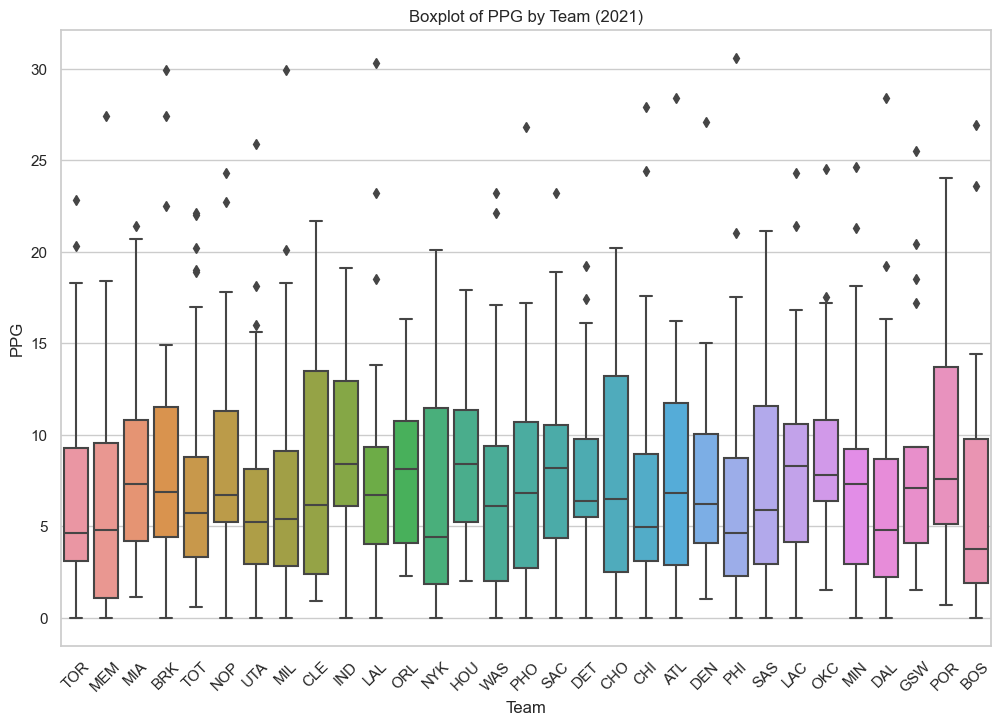

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nba2021reg_data, x='Tm', y='PTS')
plt.title('Boxplot of PPG by Team (2021)')
plt.xlabel('Team')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.show()


### Pie Chart of Position Distribution

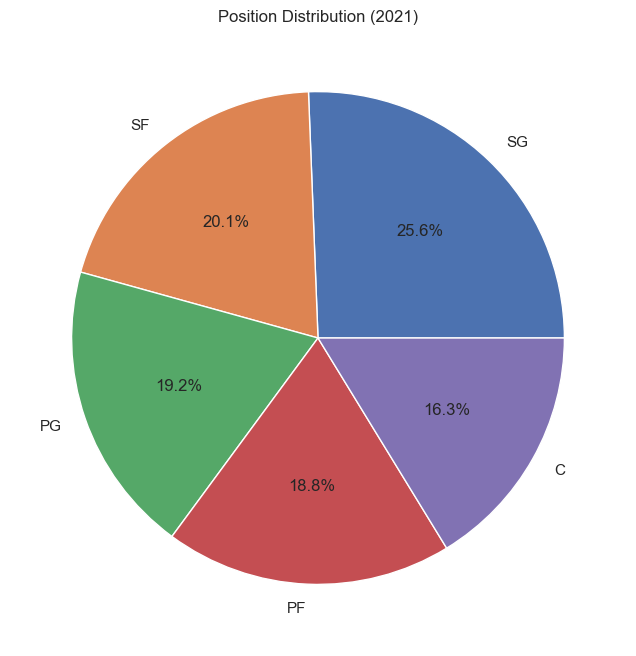

In [22]:
plt.figure(figsize=(8, 8))
nba2021reg_data['Pos'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution (2021)')
plt.ylabel('')
plt.show()

## 2022 Stats EDA

### Boxplot of PPG by Position

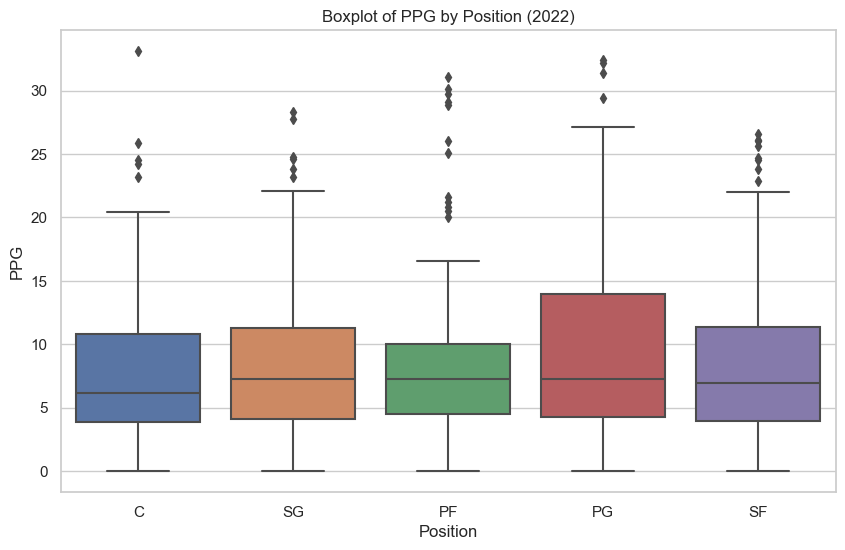

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba2022reg_data, x='Pos', y='PTS')
plt.title('Boxplot of PPG by Position (2022)')
plt.xlabel('Position')
plt.ylabel('PPG')
plt.show()

### Scatter Plot of PPG vs. Age

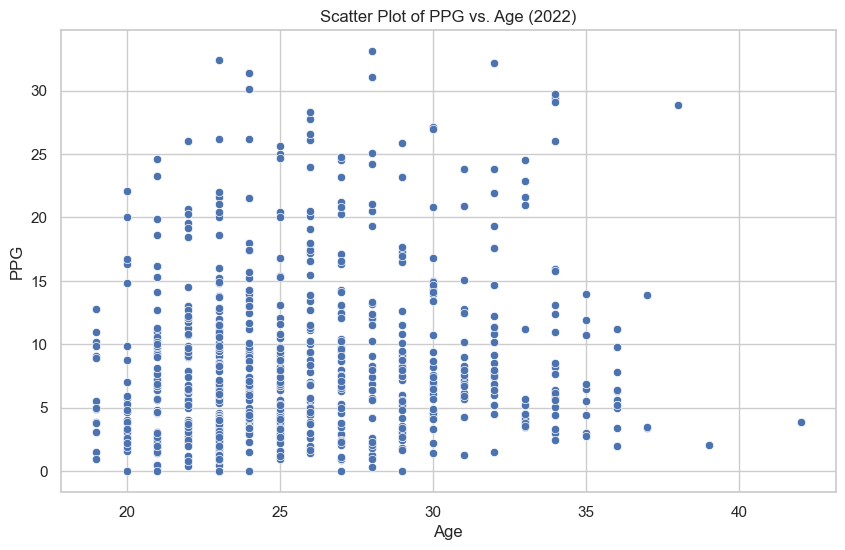

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba2022reg_data, x='Age', y='PTS')
plt.title('Scatter Plot of PPG vs. Age (2022)')
plt.xlabel('Age')
plt.ylabel('PPG')
plt.show()

### Pairplot of Selected Features

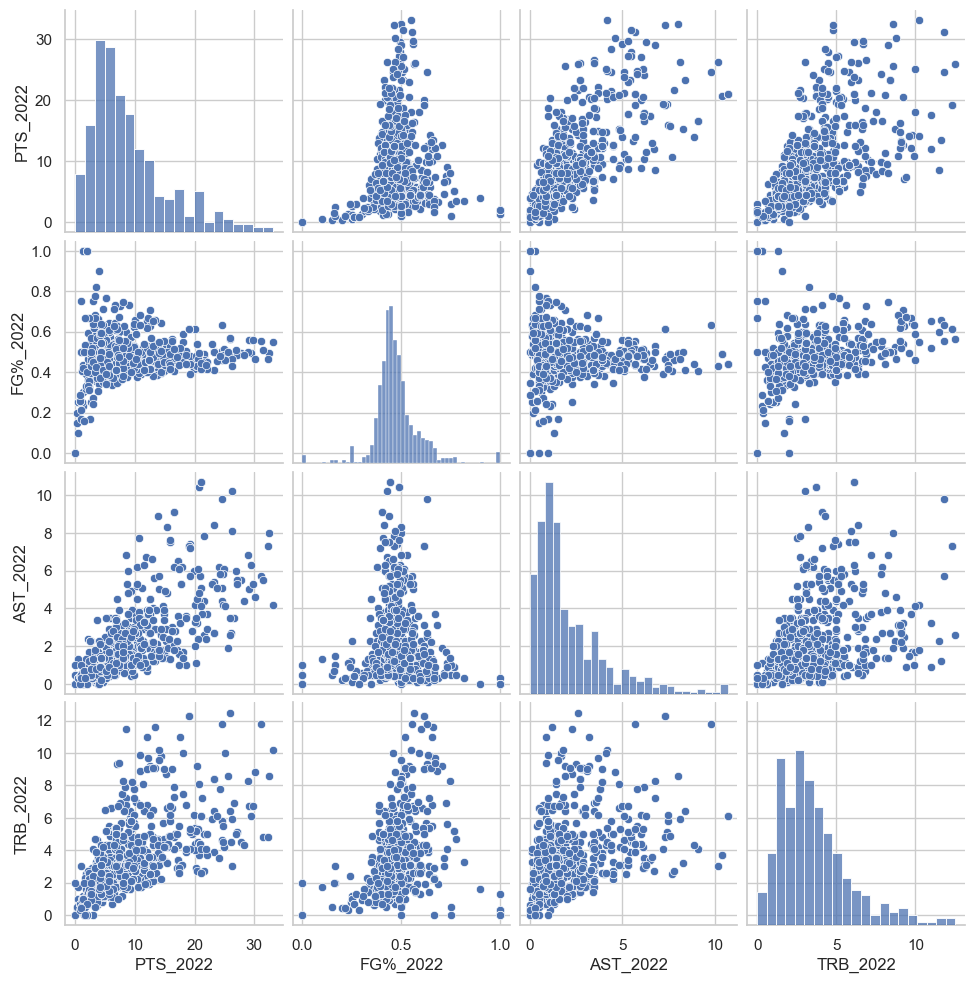

In [25]:

selected_features = ['PTS_2022', 'FG%_2022', 'AST_2022', 'TRB_2022']
sns.pairplot(merged_data[selected_features])
plt.show()

### Bar Plot of Average PPG by Team

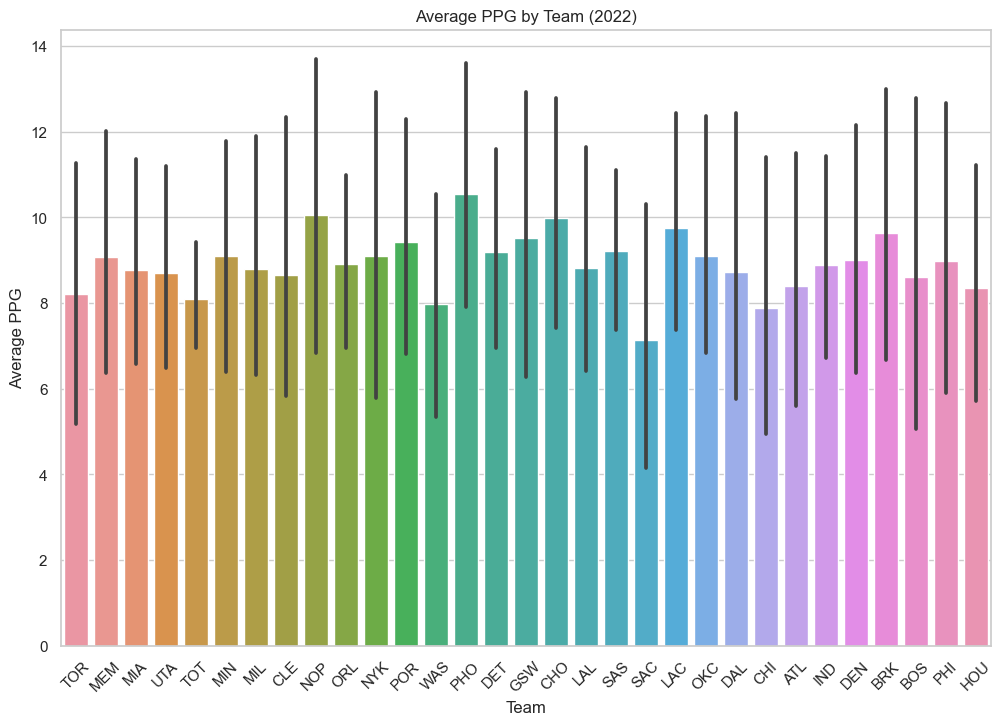

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=nba2022reg_data, x='Tm', y='PTS')
plt.title('Average PPG by Team (2022)')
plt.xlabel('Team')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()

### Line Plot of PPG Trend Over Games Played

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/1781535333.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_data, x='G_2022', y='PTS_2022', marker='o', ci=None)


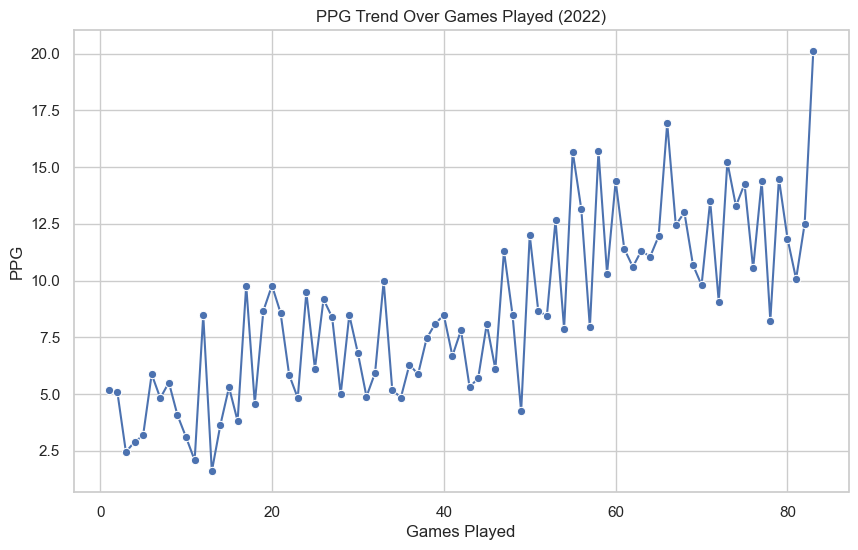

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='G_2022', y='PTS_2022', marker='o', ci=None)
plt.title('PPG Trend Over Games Played (2022)')
plt.xlabel('Games Played')
plt.ylabel('PPG')
plt.show()

### Distribution of Player Positions

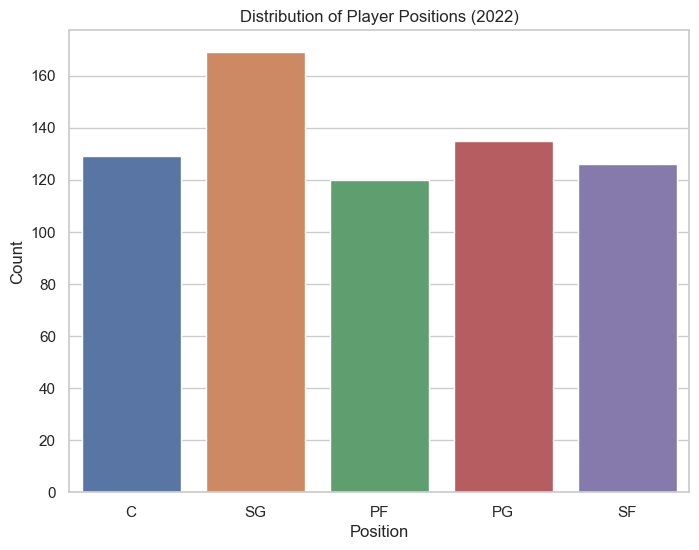

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=nba2022reg_data, x='Pos')
plt.title('Distribution of Player Positions (2022)')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

### Boxplot of PPG by Team

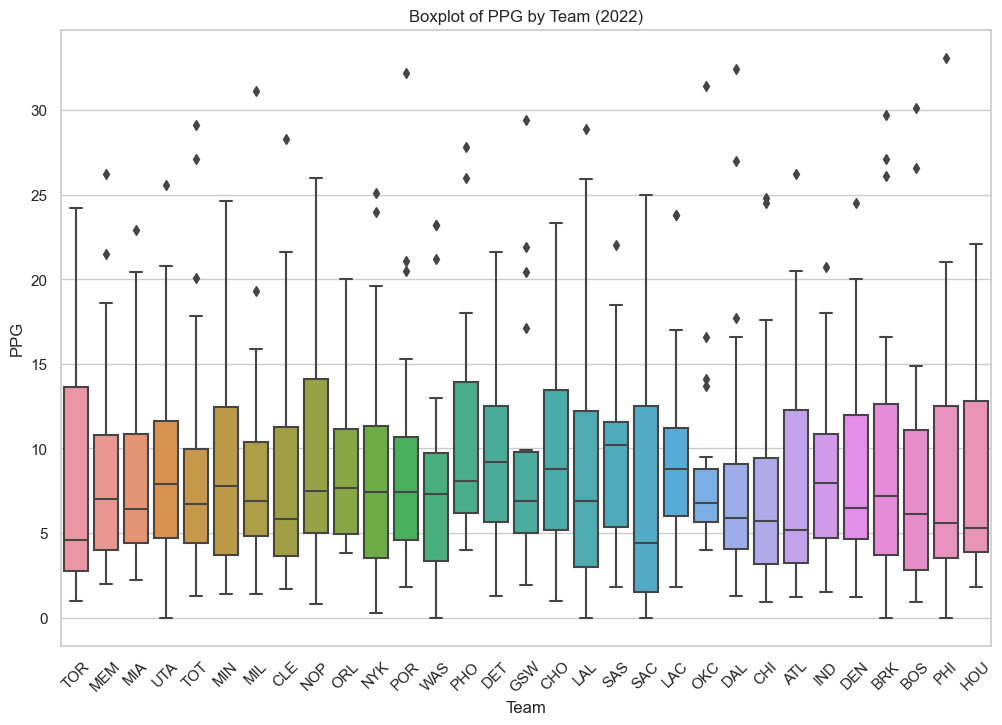

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nba2022reg_data, x='Tm', y='PTS')
plt.title('Boxplot of PPG by Team (2022)')
plt.xlabel('Team')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.show()


### Pie Chart of Position Distribution

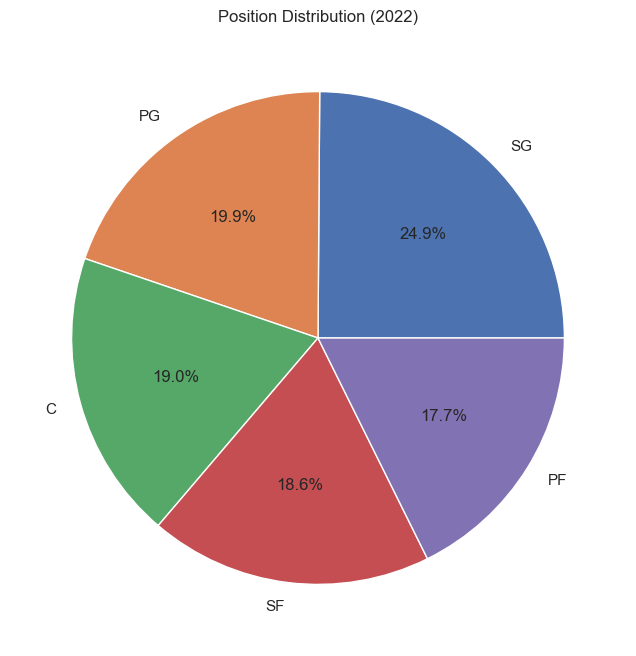

In [30]:
plt.figure(figsize=(8, 8))
nba2022reg_data['Pos'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Position Distribution (2022)')
plt.ylabel('')
plt.show()

# Baseline PPG (Linear Regression)

In [31]:
# Features from 2021 to train on (you might adjust these based on your prediction target)
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('PTS_2021', 'Player', 'Rk_2021')]

# Features from 2022 to test on (adjust similarly)
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

# Step 2: Define your target variable for both years
target_2021 = 'PTS_2021'
target_2022 = 'PTS_2022'

# Step 3: Split data
# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [32]:
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

# 4. Evaluate model performance
mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error:", mse)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_pred, y_test)
print("R-squared:", r_squared)

Mean Squared Error: 0.005881559882881518
Root Mean Squared Error: 0.07669132860292302
Mean Absolute Error: 0.06163769073563986
R-squared: 0.9998611070680655


In [33]:
predictions_df = pd.DataFrame({'Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.248023,9.2
1,Steven Adams,8.483256,8.6
2,Bam Adebayo,20.296080,20.4
3,Santi Aldama,9.016186,9.0
4,Nickeil Alexander-Walker,6.099449,6.2
...,...,...,...
712,Thaddeus Young,4.366463,4.4
713,Trae Young,26.271774,26.2
714,Omer Yurtseven,4.457569,4.4
715,Cody Zeller,6.581843,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/433773632.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test[0:50], 'ro', color ='red', alpha=0.5)


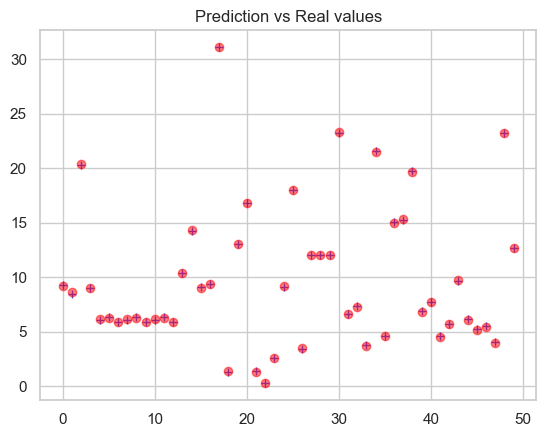

In [34]:
plt.plot(y_pred[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_test[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

# Neural Network Model for Point Prediction

## Model One (3 Layers)

In [35]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3968      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 966us/step - loss: 0.0479 - mse: 0.0479
Training MSE: 0.04790273681282997
23/23 [==============================] - 0s 910us/step - loss: 0.0893 - mse: 0.0893
Validation MSE: 0.08931096643209457 

Step :  250 / 1000
18/18 [==============================] - 0s 884us/step - loss: 0.0093 - mse: 0.0093
Training MSE: 0.009313044138252735
23/23 [==============================] - 0s 975us/step - loss: 0.0224 - mse: 0.0224
Validation MSE: 0.022431055083870888 

Step :  500 / 1000
18/18 [==============================] - 0s 842us/step - loss: 0.0044 - mse: 0.0044
Training MSE: 0.004392115864902735
23/23 [==============================] - 0s 1ms/step - loss: 0.0160 - mse: 0.0160
Validation MSE: 0.015961239114403725 

Step :  750 / 1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037
Training MSE: 0.003674175590276718
23/23 [==============================] - 0s 1ms/step - loss: 0.0148 - mse: 0.0148
Valid

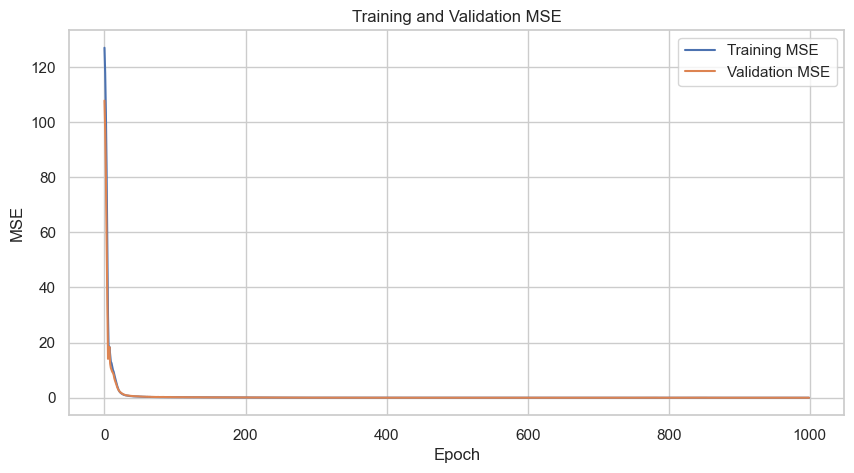

In [37]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.9996502124760565 / 1.0
MSE score =  0.014829121486422629 / 0.0


In [39]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df

,Player,M1 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.184734,9.2
1,Steven Adams,8.502146,8.6
2,Bam Adebayo,20.178026,20.4
3,Santi Aldama,8.969193,9.0
4,Nickeil Alexander-Walker,6.059977,6.2
...,...,...,...
712,Thaddeus Young,4.351509,4.4
713,Trae Young,26.211264,26.2
714,Omer Yurtseven,4.427629,4.4
715,Cody Zeller,6.488378,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


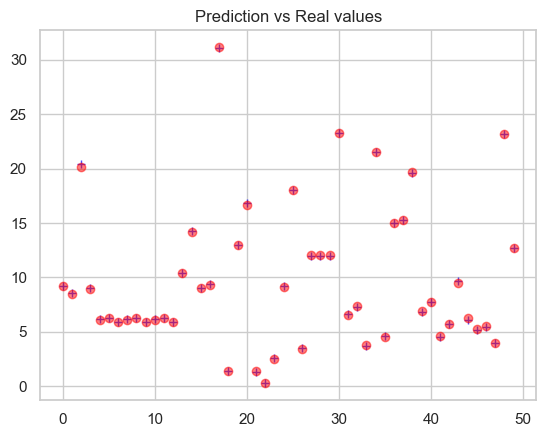

In [40]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [41]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               12400     
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 100)               15100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

In [42]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0204 - mse: 0.0204
Training MSE: 0.020432017743587494
23/23 [==============================] - 0s 967us/step - loss: 0.0543 - mse: 0.0543
Validation MSE: 0.054273784160614014 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039
Training MSE: 0.003921675030142069
23/23 [==============================] - 0s 1ms/step - loss: 0.0295 - mse: 0.0295
Validation MSE: 0.029542334377765656 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0118
Training MSE: 0.011810211464762688
23/23 [==============================] - 0s 941us/step - loss: 0.0376 - mse: 0.0376
Validation MSE: 0.03760906308889389 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012
Training MSE: 0.0012135443976148963
23/23 [==============================] - 0s 1ms/step - loss: 0.0256 - mse: 0.0256
Validatio

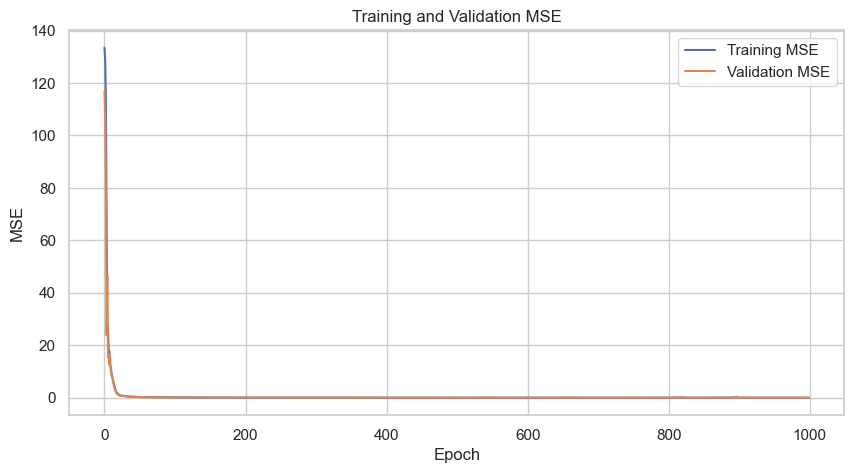

In [43]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.999395801907531 / 1.0
MSE score =  0.025614769829620757 / 0.0


In [45]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M2 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.366132,9.2
1,Steven Adams,8.429029,8.6
2,Bam Adebayo,20.309875,20.4
3,Santi Aldama,9.071073,9.0
4,Nickeil Alexander-Walker,6.009956,6.2
...,...,...,...
712,Thaddeus Young,4.435997,4.4
713,Trae Young,26.417713,26.2
714,Omer Yurtseven,4.520803,4.4
715,Cody Zeller,6.486586,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


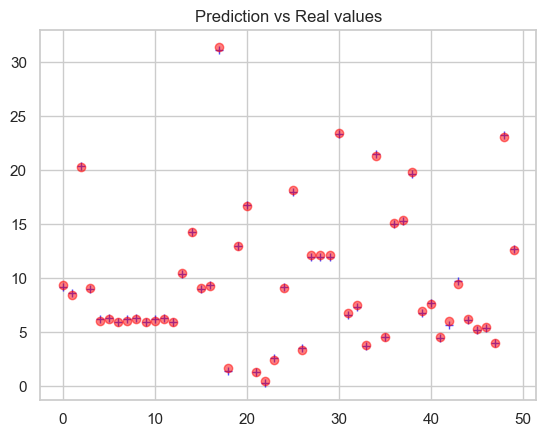

In [46]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [47]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               12400     
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 100)               15100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [48]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1930 - mse: 1.1930
Training MSE: 1.1930171251296997
23/23 [==============================] - 0s 3ms/step - loss: 1.5697 - mse: 1.5697
Validation MSE: 1.5697427988052368 

Step :  250 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 2.5330 - mse: 2.5330
Training MSE: 2.5329670906066895
23/23 [==============================] - 0s 962us/step - loss: 1.8085 - mse: 1.8085
Validation MSE: 1.8085026741027832 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9530 - mse: 0.9530
Training MSE: 0.952965497970581
23/23 [==============================] - 0s 987us/step - loss: 0.8127 - mse: 0.8127
Validation MSE: 0.8126757740974426 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 2.2193 - mse: 2.2193
Training MSE: 2.2193477153778076
23/23 [==============================] - 0s 1ms/step - loss: 3.1037 - mse: 3.1037
Validation MSE: 3.103700

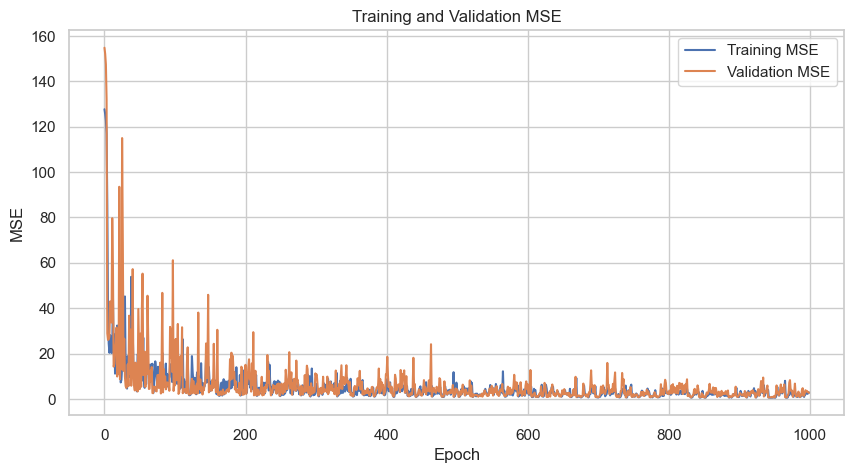

In [49]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.9267902851519559 / 1.0
MSE score =  3.1037006215324383 / 0.0


In [51]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_PTS_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_PTS_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M3 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,8.407689,9.2
1,Steven Adams,8.345111,8.6
2,Bam Adebayo,18.264576,20.4
3,Santi Aldama,7.830782,9.0
4,Nickeil Alexander-Walker,5.170662,6.2
...,...,...,...
712,Thaddeus Young,3.279078,4.4
713,Trae Young,23.509581,26.2
714,Omer Yurtseven,3.475157,4.4
715,Cody Zeller,5.074127,6.5


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


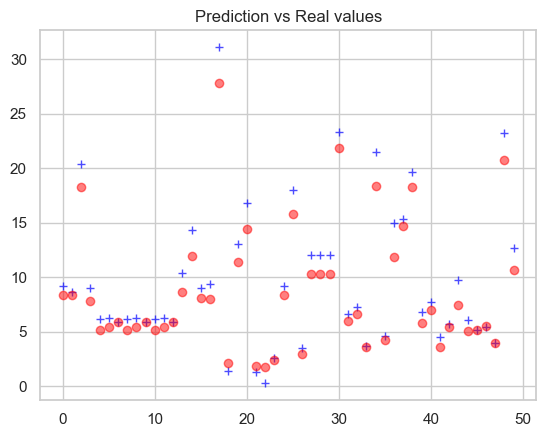

In [52]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [53]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_PTS_2022,M2 - Predicted_PTS_2022,M3 - Predicted_PTS_2022,True_PTS_2022
0,Precious Achiuwa,9.184734,9.366132,8.407689,9.2
1,Steven Adams,8.502146,8.429029,8.345111,8.6
2,Bam Adebayo,20.178026,20.309875,18.264576,20.4
3,Santi Aldama,8.969193,9.071073,7.830782,9.0
4,Nickeil Alexander-Walker,6.059977,6.009956,5.170662,6.2
...,...,...,...,...,...
712,Thaddeus Young,4.351509,4.435997,3.279078,4.4
713,Trae Young,26.211264,26.417713,23.509581,26.2
714,Omer Yurtseven,4.427629,4.520803,3.475157,4.4
715,Cody Zeller,6.488378,6.486586,5.074127,6.5


In [54]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [mse1, mse2, mse3],
    'R2 Score': [r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model       MSE  R2 Score
0         One (3 Layers)  0.014829  0.999650
1      Two (More Layers)  0.025615  0.999396
2  Three (SGD Optimizer)  3.103701  0.926790


# Baseline AST (Linear Regression)

In [55]:
# Features from 2021 to train on (you might adjust these based on your prediction target)
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('AST_2021', 'Player', 'Rk_2021')]

# Features from 2022 to test on (adjust similarly)
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

# Step 2: Define your target variable for both years
target_2021 = 'AST_2021'
target_2022 = 'AST_2022'

# Step 3: Split data
# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [56]:
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

# 4. Evaluate model performance
mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error:", mse)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_pred, y_test)
print("R-squared:", r_squared)

Mean Squared Error: 0.7641944841016322
Root Mean Squared Error: 0.8741821801556195
Mean Absolute Error: 0.6244713124964689
R-squared: 0.7484546692313266


In [57]:
predictions_df = pd.DataFrame({'Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.464967,0.9
1,Steven Adams,3.081372,2.3
2,Bam Adebayo,4.397806,3.2
3,Santi Aldama,1.234872,1.3
4,Nickeil Alexander-Walker,1.420898,1.8
...,...,...,...
712,Thaddeus Young,1.742759,1.4
713,Trae Young,9.131890,10.2
714,Omer Yurtseven,-0.071558,0.2
715,Cody Zeller,0.836932,0.7


# Neural Network Model for Assist Prediction

## Model One (3 Layers)

In [58]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                3968      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [59]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 944us/step - loss: 0.0913 - mse: 0.0913
Training MSE: 0.09127559512853622
23/23 [==============================] - 0s 1ms/step - loss: 0.6800 - mse: 0.6800
Validation MSE: 0.6800050139427185 

Step :  250 / 1000
18/18 [==============================] - 0s 855us/step - loss: 0.0359 - mse: 0.0359
Training MSE: 0.0359405092895031
23/23 [==============================] - 0s 929us/step - loss: 0.8476 - mse: 0.8476
Validation MSE: 0.8476271629333496 

Step :  500 / 1000
18/18 [==============================] - 0s 933us/step - loss: 0.0138 - mse: 0.0138
Training MSE: 0.013836195692420006
23/23 [==============================] - 0s 1ms/step - loss: 0.8473 - mse: 0.8473
Validation MSE: 0.8472864627838135 

Step :  750 / 1000
18/18 [==============================] - 0s 922us/step - loss: 0.0121 - mse: 0.0121
Training MSE: 0.012134515680372715
23/23 [==============================] - 0s 1ms/step - loss: 0.8891 - mse: 0.8891
Validation M

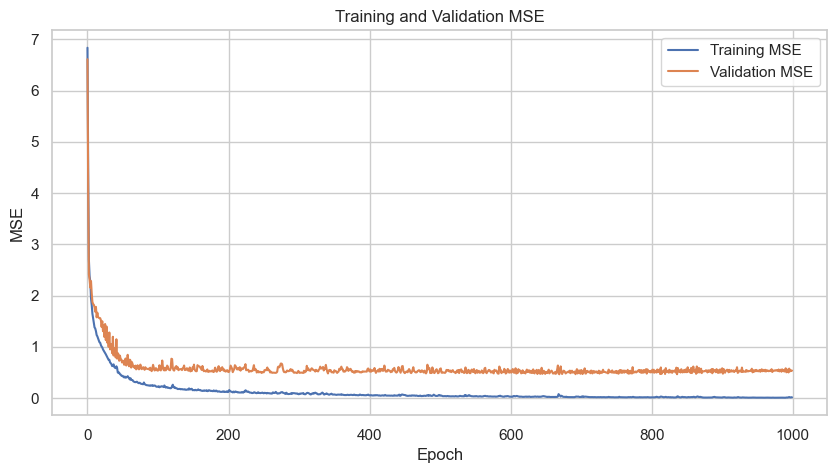

In [60]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [61]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.7774678300370248 / 1.0
MSE score =  0.8891457167809239 / 0.0


In [62]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.489816,0.9
1,Steven Adams,2.755435,2.3
2,Bam Adebayo,2.755424,3.2
3,Santi Aldama,1.337929,1.3
4,Nickeil Alexander-Walker,0.738096,1.8
...,...,...,...
712,Thaddeus Young,2.075139,1.4
713,Trae Young,9.995819,10.2
714,Omer Yurtseven,0.317921,0.2
715,Cody Zeller,0.776616,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


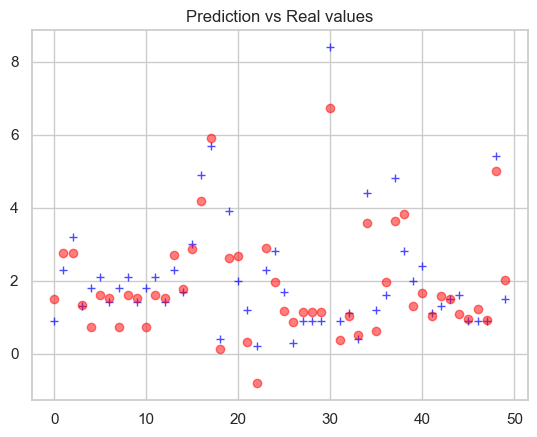

In [63]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [64]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(175, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(75, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               12400     
                                                                 
 dense_19 (Dense)            (None, 175)               35175     
                                                                 
 dense_20 (Dense)            (None, 150)               26400     
                                                                 
 dense_21 (Dense)            (None, 100)               15100     
                                                                 
 dense_22 (Dense)            (None, 75)                7575      
                                                                 
 dense_23 (Dense)            (None, 50)                3800      
                                                                 
 dense_24 (Dense)            (None, 25)               

In [65]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206
Training MSE: 0.020645014941692352
23/23 [==============================] - 0s 1ms/step - loss: 0.6588 - mse: 0.6588
Validation MSE: 0.658828854560852 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2239 - mse: 0.2239
Training MSE: 0.22392523288726807
23/23 [==============================] - 0s 1ms/step - loss: 0.7387 - mse: 0.7387
Validation MSE: 0.7386925220489502 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 5.0785e-05 - mse: 5.0785e-05
Training MSE: 5.078459071228281e-05
23/23 [==============================] - 0s 1ms/step - loss: 0.6966 - mse: 0.6966
Validation MSE: 0.6966288685798645 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036
Training MSE: 0.0035989265888929367
23/23 [==============================] - 0s 1ms/step - loss: 0.6924 - mse: 0.6924
Validation 

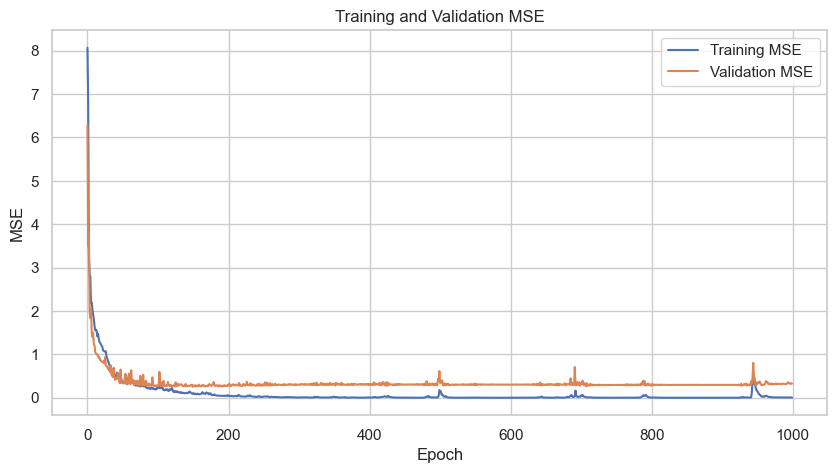

In [66]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.8266996867944411 / 1.0
MSE score =  0.6924357553748416 / 0.0


In [68]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M2 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.434465,0.9
1,Steven Adams,1.617816,2.3
2,Bam Adebayo,4.436418,3.2
3,Santi Aldama,1.126034,1.3
4,Nickeil Alexander-Walker,1.130040,1.8
...,...,...,...
712,Thaddeus Young,1.353447,1.4
713,Trae Young,10.623419,10.2
714,Omer Yurtseven,0.214300,0.2
715,Cody Zeller,1.015449,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


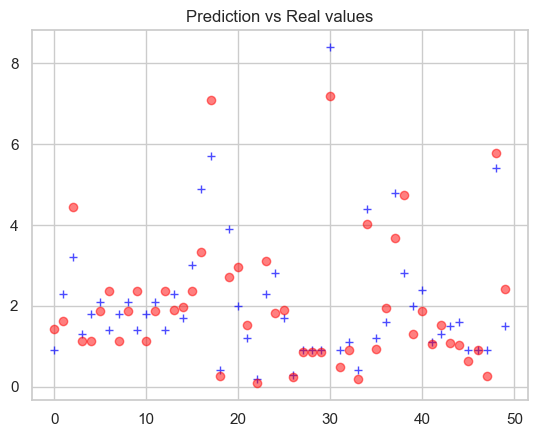

In [69]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [70]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(175, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(75, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 200)               12400     
                                                                 
 dense_27 (Dense)            (None, 175)               35175     
                                                                 
 dense_28 (Dense)            (None, 150)               26400     
                                                                 
 dense_29 (Dense)            (None, 100)               15100     
                                                                 
 dense_30 (Dense)            (None, 75)                7575      
                                                                 
 dense_31 (Dense)            (None, 50)                3800      
                                                                 
 dense_32 (Dense)            (None, 25)               

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [71]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 3.2945 - mse: 3.2945
Training MSE: 3.294468879699707
23/23 [==============================] - 0s 1ms/step - loss: 3.9461 - mse: 3.9461
Validation MSE: 3.9460551738739014 

Step :  250 / 1000
12/12 [==============================] - 0s 2ms/step - loss: 1.6088 - mse: 1.6088
Training MSE: 1.608757495880127
23/23 [==============================] - 0s 2ms/step - loss: 1.9630 - mse: 1.9630
Validation MSE: 1.9629842042922974 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.3185 - mse: 1.3185
Training MSE: 1.3184864521026611
23/23 [==============================] - 0s 1ms/step - loss: 1.7299 - mse: 1.7299
Validation MSE: 1.729900598526001 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0337 - mse: 1.0337
Training MSE: 1.0337498188018799
23/23 [==============================] - 0s 1ms/step - loss: 1.4994 - mse: 1.4994
Validation MSE: 1.499433040618

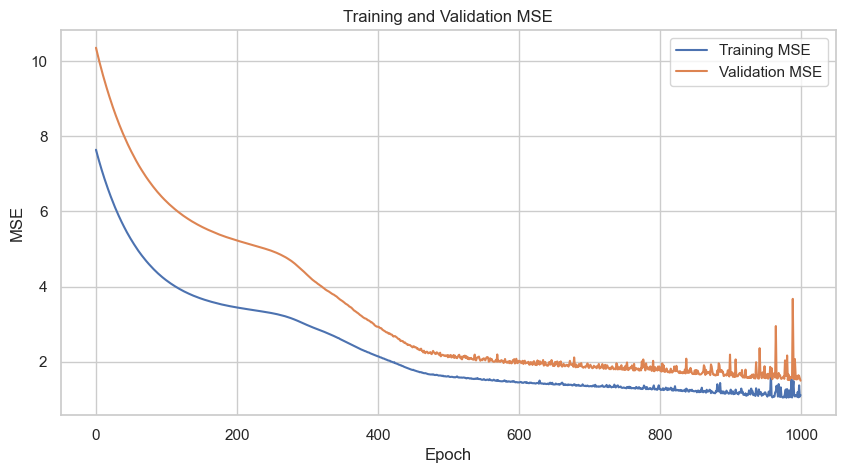

In [72]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.6247272749879745 / 1.0
MSE score =  1.499433255536331 / 0.0


In [74]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_AST_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_AST_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M3 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.605531,0.9
1,Steven Adams,1.671500,2.3
2,Bam Adebayo,4.244133,3.2
3,Santi Aldama,1.621003,1.3
4,Nickeil Alexander-Walker,1.409096,1.8
...,...,...,...
712,Thaddeus Young,1.096408,1.4
713,Trae Young,7.677761,10.2
714,Omer Yurtseven,0.814518,0.2
715,Cody Zeller,1.189438,0.7


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


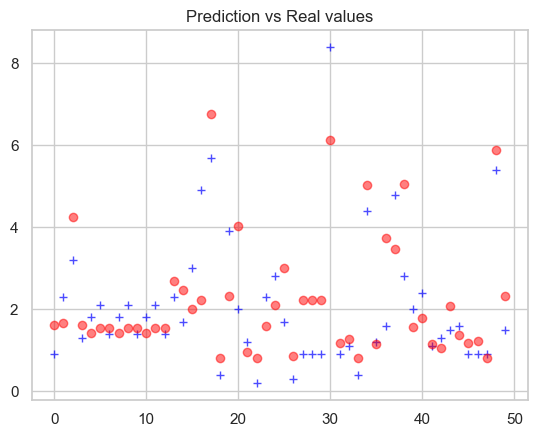

In [75]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [76]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_AST_2022,M2 - Predicted_AST_2022,M3 - Predicted_AST_2022,True_AST_2022
0,Precious Achiuwa,1.489816,1.434465,1.605531,0.9
1,Steven Adams,2.755435,1.617816,1.671500,2.3
2,Bam Adebayo,2.755424,4.436418,4.244133,3.2
3,Santi Aldama,1.337929,1.126034,1.621003,1.3
4,Nickeil Alexander-Walker,0.738096,1.130040,1.409096,1.8
...,...,...,...,...,...
712,Thaddeus Young,2.075139,1.353447,1.096408,1.4
713,Trae Young,9.995819,10.623419,7.677761,10.2
714,Omer Yurtseven,0.317921,0.214300,0.814518,0.2
715,Cody Zeller,0.776616,1.015449,1.189438,0.7


In [77]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [mse1, mse2, mse3],
    'R2 Score': [r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model       MSE  R2 Score
0         One (3 Layers)  0.889146  0.777468
1      Two (More Layers)  0.692436  0.826700
2  Three (SGD Optimizer)  1.499433  0.624727


# Baseline TRB (Linear Regression)

In [78]:
# Features from 2021 to train on (you might adjust these based on your prediction target)
features_2021 = [col for col in merged_data.columns if '_2021' in col and col not in ('TRB_2021', 'Player', 'Rk_2021')]

# Features from 2022 to test on (adjust similarly)
features_2022 = [col.replace('_2021', '_2022') for col in features_2021]

# Step 2: Define your target variable for both years
target_2021 = 'TRB_2021'
target_2022 = 'TRB_2022'

# Step 3: Split data
# Training set from 2021
X_train = merged_data[features_2021]
y_train = merged_data[target_2021]

# Testing set from 2022
X_test = merged_data[features_2022]
y_test = merged_data[target_2022]

In [79]:
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
X_test.columns = [col.replace('_2022', '_2021') for col in X_test.columns]
y_pred = model.predict(X_test)

# 4. Evaluate model performance
mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error:", mse)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_pred, y_test)
print("R-squared:", r_squared)

Mean Squared Error: 0.0027503170786282384
Root Mean Squared Error: 0.05244346554746586
Mean Absolute Error: 0.03454319089531099
R-squared: 0.9994683178474395


In [80]:
predictions_df = pd.DataFrame({'Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.888036,6.0
1,Steven Adams,11.551182,11.5
2,Bam Adebayo,9.251071,9.2
3,Santi Aldama,4.812282,4.8
4,Nickeil Alexander-Walker,1.800920,1.7
...,...,...,...
712,Thaddeus Young,3.070187,3.1
713,Trae Young,2.999013,3.0
714,Omer Yurtseven,2.611259,2.6
715,Cody Zeller,4.336644,4.3


# Neural Network Model for Rebound Prediction

## Model One (3 Layers)

In [81]:
# Building the model
model = Sequential()
model.add(Dense(64, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu')) 
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                3968      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [82]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026
Training MSE: 0.002624907298013568
23/23 [==============================] - 0s 1ms/step - loss: 0.0060 - mse: 0.0060
Validation MSE: 0.005994428880512714 

Step :  250 / 1000
18/18 [==============================] - 0s 930us/step - loss: 0.0014 - mse: 0.0014  
Training MSE: 0.0013913620496168733
23/23 [==============================] - 0s 987us/step - loss: 0.0048 - mse: 0.0048
Validation MSE: 0.004762459546327591 

Step :  500 / 1000
18/18 [==============================] - 0s 998us/step - loss: 0.0016 - mse: 0.0016
Training MSE: 0.0015767615986987948
23/23 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055
Validation MSE: 0.005499257706105709 

Step :  750 / 1000
18/18 [==============================] - 0s 975us/step - loss: 0.0039 - mse: 0.0039
Training MSE: 0.0039167506620287895
23/23 [==============================] - 0s 908us/step - loss: 0.0082 - mse: 0.008

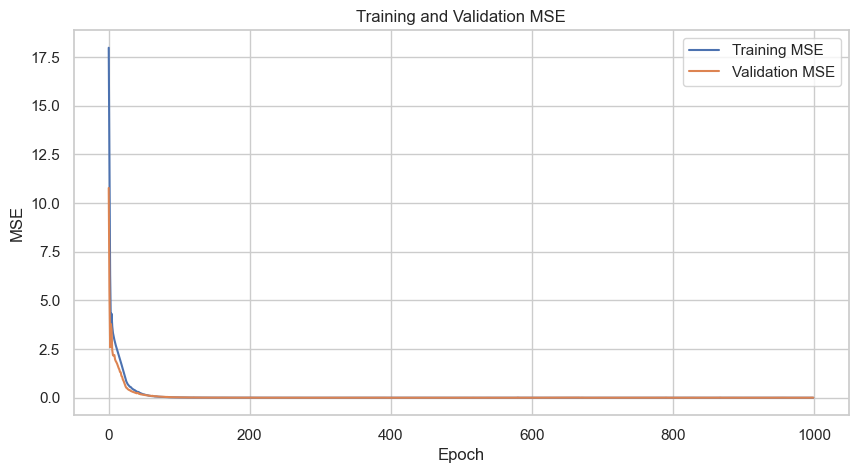

In [83]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [84]:
y_pred = model.predict(X_test, verbose=0)
r21 = r2_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.9984128714474857 / 1.0
MSE score =  0.008207183330073607 / 0.0


In [85]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.916831,6.0
1,Steven Adams,11.671597,11.5
2,Bam Adebayo,9.377654,9.2
3,Santi Aldama,4.921362,4.8
4,Nickeil Alexander-Walker,1.818803,1.7
...,...,...,...
712,Thaddeus Young,3.111465,3.1
713,Trae Young,3.160356,3.0
714,Omer Yurtseven,2.577681,2.6
715,Cody Zeller,4.341152,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


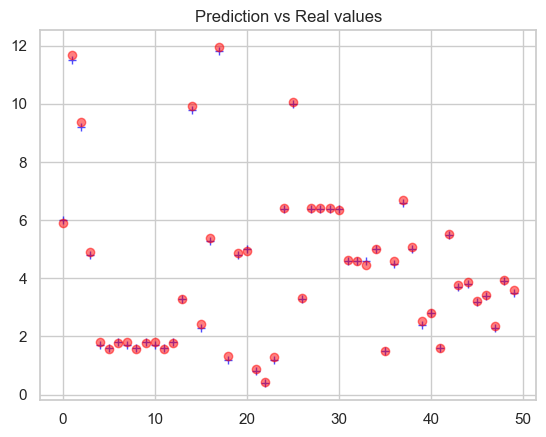

In [86]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Two (More Layers)

In [87]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 200)               12400     
                                                                 
 dense_38 (Dense)            (None, 150)               30150     
                                                                 
 dense_39 (Dense)            (None, 100)               15100     
                                                                 
 dense_40 (Dense)            (None, 50)                5050      
                                                                 
 dense_41 (Dense)            (None, 25)                1275      
                                                                 
 dense_42 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

In [88]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0080 - mse: 0.0080
Training MSE: 0.00802536215633154
23/23 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Validation MSE: 0.014240057207643986 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 7.7630e-04 - mse: 7.7630e-04
Training MSE: 0.0007763034664094448
23/23 [==============================] - 0s 992us/step - loss: 0.0071 - mse: 0.0071
Validation MSE: 0.007119506131857634 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 5.8627e-04 - mse: 5.8627e-04
Training MSE: 0.0005862745456397533
23/23 [==============================] - 0s 989us/step - loss: 0.0073 - mse: 0.0073
Validation MSE: 0.0073415073566138744 

Step :  750 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013
Training MSE: 0.0012628125259652734
23/23 [==============================] - 0s 1ms/step - loss: 0.0083 - ms

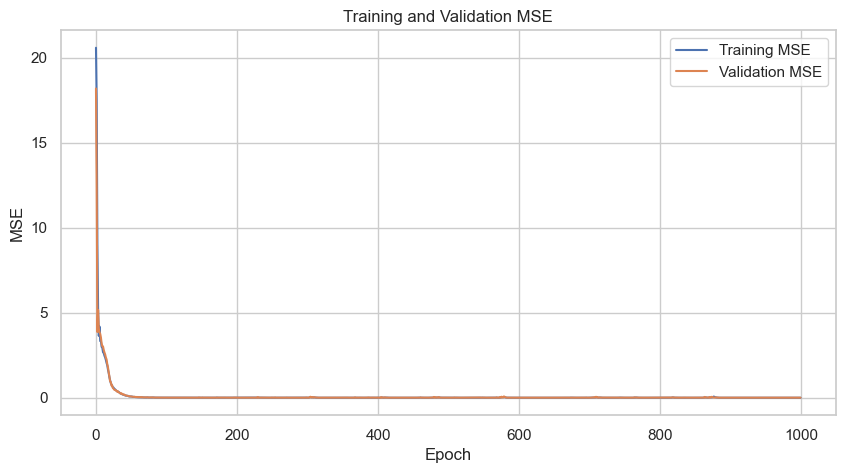

In [89]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
y_pred = model.predict(X_test, verbose=0)
r22 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.9983984880753864 / 1.0
MSE score =  0.0082815610303149 / 0.0


In [91]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M2 - Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.898922,6.0
1,Steven Adams,11.479712,11.5
2,Bam Adebayo,9.266865,9.2
3,Santi Aldama,4.863578,4.8
4,Nickeil Alexander-Walker,1.762460,1.7
...,...,...,...
712,Thaddeus Young,3.108347,3.1
713,Trae Young,2.975326,3.0
714,Omer Yurtseven,2.516917,2.6
715,Cody Zeller,4.311780,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


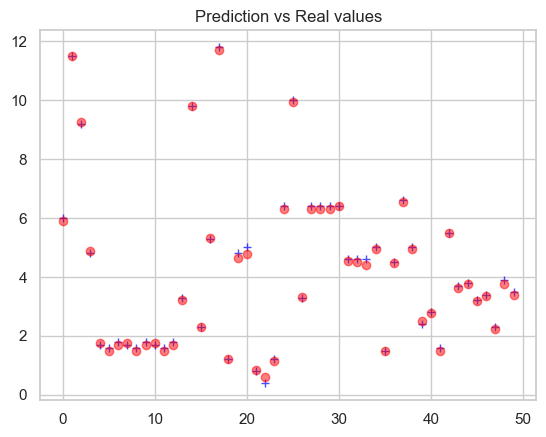

In [92]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Three (Different Optimizer)

In [93]:
# Building the model
model = Sequential()
model.add(Dense(200, input_dim=61, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu')) 
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss = 'mse', optimizer= SGD(lr=0.001), metrics=['mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 200)               12400     
                                                                 
 dense_44 (Dense)            (None, 150)               30150     
                                                                 
 dense_45 (Dense)            (None, 100)               15100     
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dense_47 (Dense)            (None, 25)                1275      
                                                                 
 dense_48 (Dense)            (None, 1)                 26        
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trai

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [94]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
train_hist =np.array([])
test_hist =np.array([])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation MSE:", score[1], "\n")
    train_hist = np.concatenate((train_hist, np.array(history.history['mse'])), axis = 0)
    test_hist = np.concatenate((test_hist, np.array(history.history['val_mse'])), axis = 0)
    

Step :  0 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.7401 - mse: 0.7401
Training MSE: 0.7400577664375305
23/23 [==============================] - 0s 1ms/step - loss: 0.9825 - mse: 0.9825
Validation MSE: 0.9825462698936462 

Step :  250 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4702 - mse: 0.4702
Training MSE: 0.47017836570739746
23/23 [==============================] - 0s 1ms/step - loss: 0.5384 - mse: 0.5384
Validation MSE: 0.5383570194244385 

Step :  500 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5884 - mse: 0.5884
Training MSE: 0.5883817076683044
23/23 [==============================] - 0s 970us/step - loss: 0.6386 - mse: 0.6386
Validation MSE: 0.6385634541511536 

Step :  750 / 1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3262 - mse: 0.3262
Training MSE: 0.3262177109718323
23/23 [==============================] - 0s 2ms/step - loss: 0.4267 - mse: 0.4267
Validation MSE: 0.426658

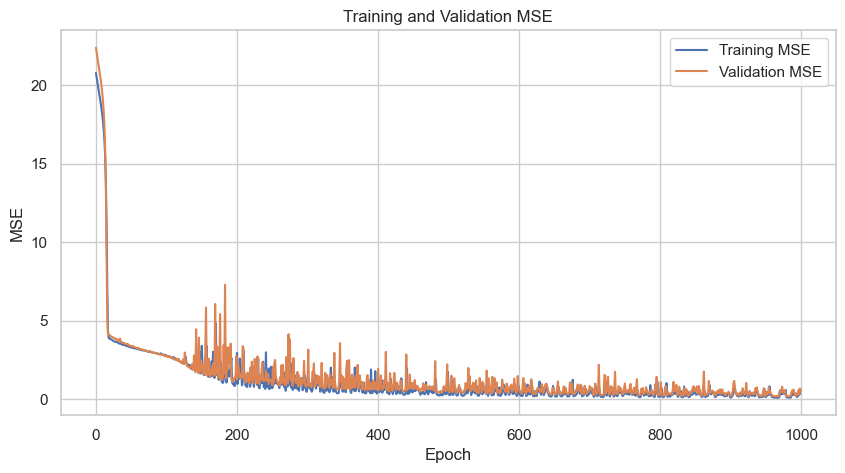

In [95]:
# Plot training and validation MSE
plt.figure(figsize=(10, 5))
plt.plot(train_hist, label='Training MSE')
plt.plot(test_hist, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
y_pred = model.predict(X_test, verbose=0)
r23 = r2_score(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score =  0.9174915792079955 / 1.0
MSE score =  0.4266584043504889 / 0.0


In [97]:
predictions_df3 = pd.DataFrame({'Predicted_TRB_2022': y_pred.flatten()})
true_values_df = pd.DataFrame({'True_TRB_2022': y_test.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,6.215569,6.0
1,Steven Adams,10.745421,11.5
2,Bam Adebayo,11.138228,9.2
3,Santi Aldama,4.981419,4.8
4,Nickeil Alexander-Walker,2.292500,1.7
...,...,...,...
712,Thaddeus Young,3.317164,3.1
713,Trae Young,4.759222,3.0
714,Omer Yurtseven,2.693247,2.6
715,Cody Zeller,4.521333,4.3


/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_21776/3980570447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)


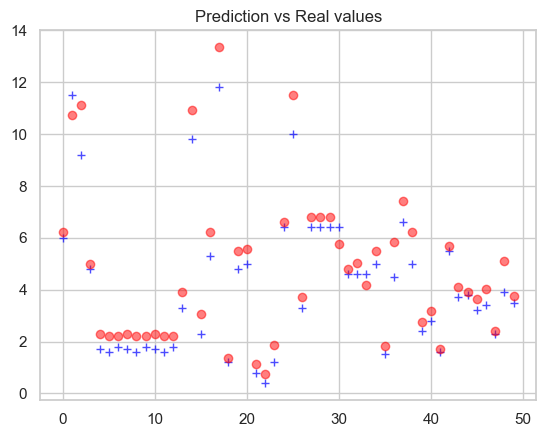

In [98]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

## Model Comparison

In [99]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_TRB_2022,M2 - Predicted_TRB_2022,Predicted_TRB_2022,True_TRB_2022
0,Precious Achiuwa,5.916831,5.898922,6.215569,6.0
1,Steven Adams,11.671597,11.479712,10.745421,11.5
2,Bam Adebayo,9.377654,9.266865,11.138228,9.2
3,Santi Aldama,4.921362,4.863578,4.981419,4.8
4,Nickeil Alexander-Walker,1.818803,1.762460,2.292500,1.7
...,...,...,...,...,...
712,Thaddeus Young,3.111465,3.108347,3.317164,3.1
713,Trae Young,3.160356,2.975326,4.759222,3.0
714,Omer Yurtseven,2.577681,2.516917,2.693247,2.6
715,Cody Zeller,4.341152,4.311780,4.521333,4.3


In [100]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'MSE': [mse1, mse2, mse3],
    'R2 Score': [r21, r22, r23]
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model       MSE  R2 Score
0         One (3 Layers)  0.008207  0.998413
1      Two (More Layers)  0.008282  0.998398
2  Three (SGD Optimizer)  0.426658  0.917492


# Neural Network Model for Predicting Player Position 2021-2022 Season

## Baseline (Logistic Regression)

In [101]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert one-hot encoded target into class labels
y_train_labels = y_train.values.argmax(axis=1)
y_test_labels = y_test.values.argmax(axis=1)

# Initialize the Logistic Regression model with OvR strategy
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train_labels)

# Predict the class labels
y_pred_labels = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)



Accuracy: 0.5277777777777778


## Model One (3 Layers)

In [102]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [104]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.7336
Training Loss: 0.760033905506134
Training Accuracy: 0.7336244583129883
5/5 [==============================] - 0s 2ms/step - loss: 1.0147 - accuracy: 0.5139
Validation Loss: 1.014695167541504
Validation Accuracy: 0.5138888955116272 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.8472
Training Loss: 0.5157414078712463
Training Accuracy: 0.847161591053009
5/5 [==============================] - 0s 2ms/step - loss: 1.1044 - accuracy: 0.5764
Validation Loss: 1.104377269744873
Validation Accuracy: 0.5763888955116272 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.9083
Training Loss: 0.3795934319496155
Training Accuracy: 0.9082969427108765
5/5 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.6458
Validation Loss: 1.0703169107437134
Validation Accuracy: 0.64

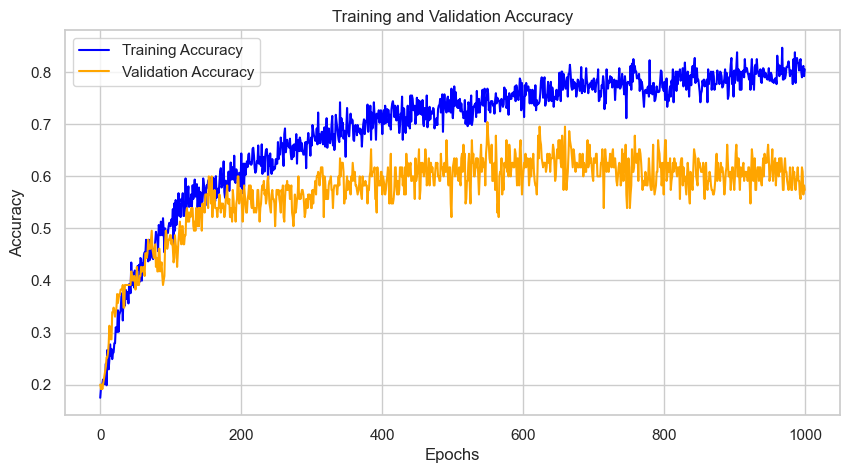

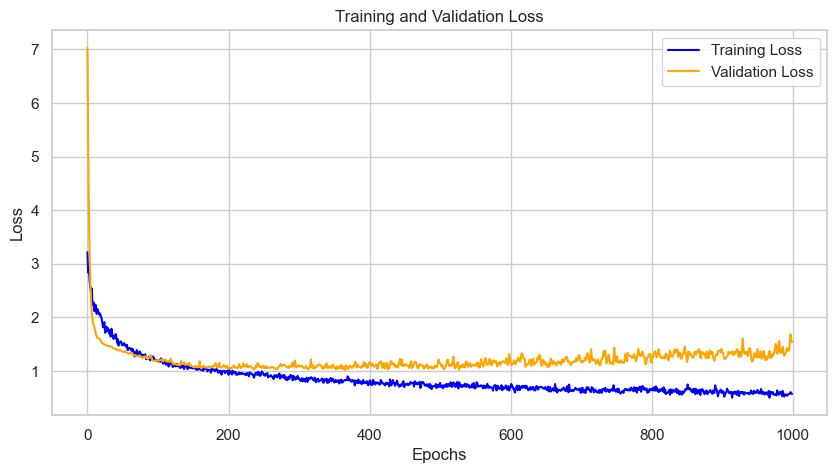

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
y_pred = model.predict(X_test, verbose=0)

In [107]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [108]:
y_pred_discrete

array([4, 0, 4, 3, 3, 1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 4, 3, 1,
       0, 3, 0, 0, 4, 0, 0, 0, 3, 4, 4, 1, 1, 2, 1, 4, 3, 3, 4, 3, 2, 1,
       4, 4, 2, 2, 4, 4, 1, 2, 0, 0, 1, 4, 0, 2, 4, 4, 4, 1, 1, 1, 0, 3,
       4, 2, 2, 0, 1, 3, 4, 1, 2, 4, 1, 1, 2, 4, 2, 1, 0, 2, 0, 2, 0, 1,
       4, 2, 0, 0, 4, 0, 1, 0, 0, 3, 4, 1, 0, 1, 0, 4, 2, 2, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 4, 3, 2, 2, 2, 3, 0, 3, 1, 3, 0, 1, 2, 0, 2, 4, 4,
       4, 4, 4, 4, 0, 1, 4, 1, 0, 4, 0, 2])

In [109]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [110]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M1 - Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M1 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [111]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M1 - Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy1 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy1)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.92      0.73        24
         1.0       0.45      0.52      0.48        27
         2.0       0.70      0.83      0.76        23
         3.0       0.59      0.29      0.39        34
         4.0       0.76      0.69      0.72        36

    accuracy                           0.62       144
   macro avg       0.62      0.65      0.62       144
weighted avg       0.63      0.62      0.61       144



## Model Two (More Layers)

In [112]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Building a more complex model
model = Sequential([
    Dense(200, activation='relu', input_dim=57),
    BatchNormalization(),
    Dropout(0.5),
    Dense(175, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(150, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 200)               11600     
                                                                 
 batch_normalization_2 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_53 (Dense)            (None, 175)               35175     
                                                                 
 batch_normalization_3 (Batc  (None, 175)              700       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 175)             

In [114]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.9107 - accuracy: 0.5961
Training Loss: 0.9107441902160645
Training Accuracy: 0.596069872379303
5/5 [==============================] - 0s 2ms/step - loss: 1.0437 - accuracy: 0.5347
Validation Loss: 1.0436663627624512
Validation Accuracy: 0.5347222089767456 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7773
Training Loss: 0.6358134150505066
Training Accuracy: 0.7772925496101379
5/5 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.5694
Validation Loss: 1.0335878133773804
Validation Accuracy: 0.5694444179534912 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8515
Training Loss: 0.4325326383113861
Training Accuracy: 0.8515284061431885
5/5 [==============================] - 0s 2ms/step - loss: 1.1192 - accuracy: 0.5764
Validation Loss: 1.119242787361145
Validation Accuracy: 0.

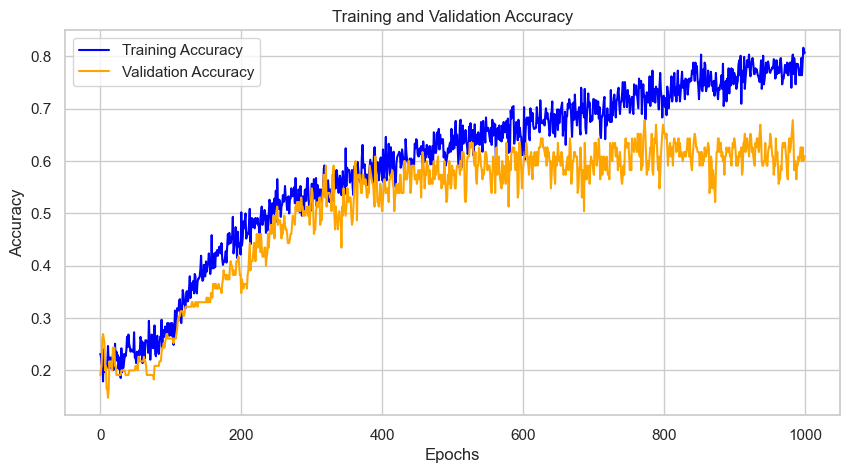

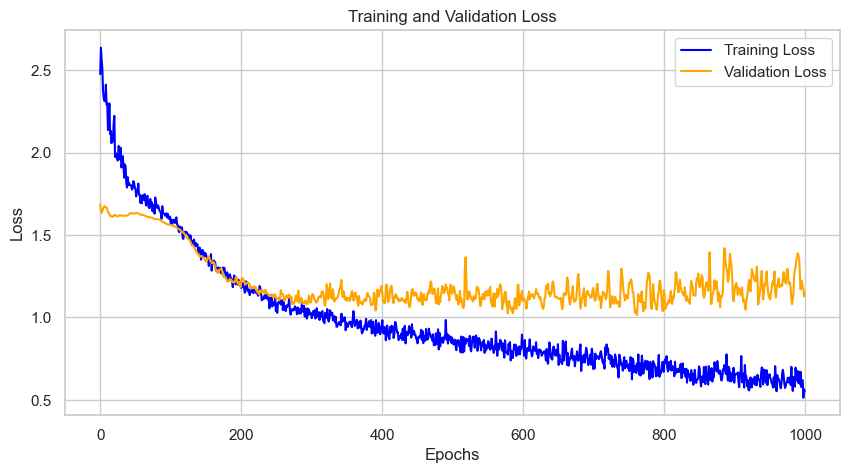

In [115]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
y_pred = model.predict(X_test, verbose=0)

In [117]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [118]:
y_pred_discrete

array([4, 0, 3, 4, 3, 3, 0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 2, 2, 2, 3, 3, 1,
       1, 3, 0, 3, 4, 0, 0, 0, 3, 2, 3, 1, 1, 2, 1, 2, 4, 3, 4, 3, 2, 1,
       1, 4, 2, 2, 4, 4, 0, 2, 0, 0, 1, 4, 0, 2, 4, 3, 4, 1, 1, 1, 0, 3,
       4, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 2, 4, 2, 1, 0, 2, 1, 2, 0, 1,
       3, 2, 0, 0, 3, 0, 1, 0, 0, 3, 4, 1, 1, 1, 0, 4, 2, 2, 1, 3, 2, 2,
       1, 0, 0, 0, 4, 3, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 1, 2, 0, 2, 3, 4,
       2, 1, 4, 2, 0, 1, 4, 1, 0, 3, 0, 2])

In [119]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [120]:
predictions_df2 = pd.DataFrame({'M2 -Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M2 -Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M2 -Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,3.0,4.0
3,Santi Aldama,4.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,3.0,4.0
142,Anthony Davis,0.0,0.0


In [121]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M2 -Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy2 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy2)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.5694444444444444
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        24
         1.0       0.47      0.59      0.52        27
         2.0       0.62      0.87      0.73        23
         3.0       0.41      0.35      0.38        34
         4.0       0.58      0.31      0.40        36

    accuracy                           0.57       144
   macro avg       0.57      0.62      0.58       144
weighted avg       0.56      0.57      0.55       144



## Model Three (Different Optimizer)

In [122]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2021' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2021']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2021')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 32)              

In [124]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.2581 - accuracy: 0.5087
Training Loss: 1.2581335306167603
Training Accuracy: 0.5087336301803589
5/5 [==============================] - 0s 2ms/step - loss: 1.2961 - accuracy: 0.4444
Validation Loss: 1.296128273010254
Validation Accuracy: 0.4444444477558136 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1779 - accuracy: 0.5240
Training Loss: 1.1778743267059326
Training Accuracy: 0.5240174531936646
5/5 [==============================] - 0s 2ms/step - loss: 1.1726 - accuracy: 0.5139
Validation Loss: 1.1726425886154175
Validation Accuracy: 0.5138888955116272 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1716 - accuracy: 0.5218
Training Loss: 1.1716241836547852
Training Accuracy: 0.5218340754508972
5/5 [==============================] - 0s 2ms/step - loss: 1.2615 - accuracy: 0.4236
Validation Loss: 1.2614949941635132
Validation Accuracy: 0

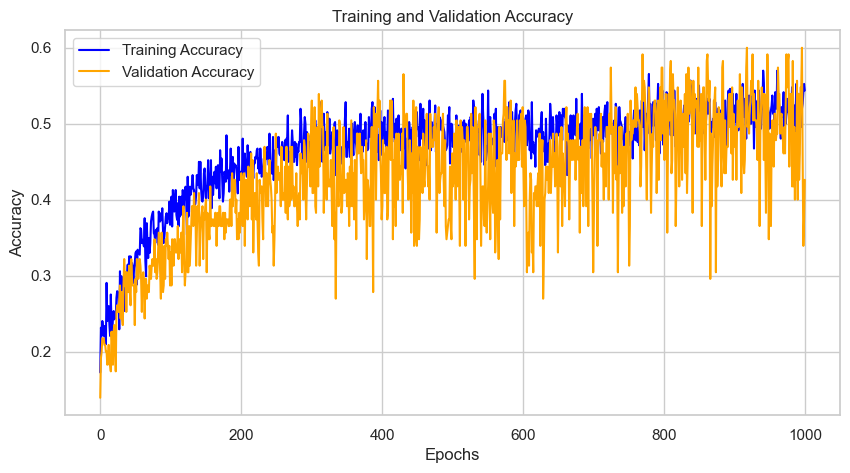

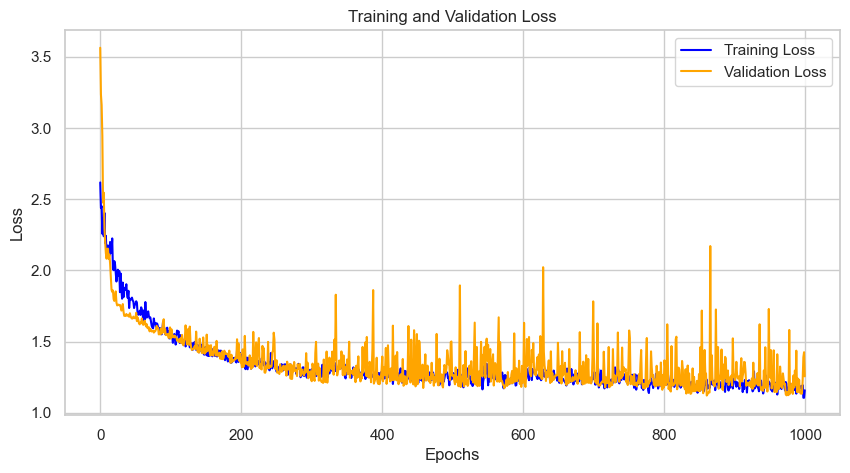

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
y_pred = model.predict(X_test, verbose=0)

In [127]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [128]:
y_pred_discrete

array([4, 1, 4, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 0, 1, 0, 4, 4, 2, 4, 3, 1,
       1, 3, 0, 1, 4, 1, 0, 0, 4, 4, 4, 1, 1, 2, 3, 4, 3, 4, 1, 4, 4, 3,
       4, 4, 4, 4, 4, 3, 0, 4, 0, 1, 1, 4, 1, 4, 4, 3, 4, 1, 3, 3, 0, 1,
       4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 3, 0, 4, 4, 4, 1, 1, 4, 1, 4, 0, 1,
       4, 4, 0, 1, 4, 1, 3, 0, 1, 3, 4, 1, 1, 1, 0, 4, 4, 4, 3, 3, 4, 4,
       1, 0, 0, 0, 3, 3, 3, 4, 3, 2, 3, 1, 3, 4, 3, 1, 0, 4, 0, 4, 4, 4,
       4, 3, 4, 4, 1, 1, 4, 1, 0, 4, 1, 4])

In [129]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2021': 0, 'Pos_PF_2021': 1, 'Pos_PG_2021': 2, 'Pos_SF_2021': 3, 'Pos_SG_2021': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [130]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_POS_2021': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2021': y_test_mapped.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M3 - Predicted_POS_2021', 'True_POS_2021'])
filtered_df

,Player,M3 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,1.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,1.0,0.0


In [131]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M3 - Predicted_POS_2021']
y_true = filtered_df['True_POS_2021']

# Compute accuracy score
accuracy3 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy3)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.5486111111111112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.67      0.71        24
         1.0       0.39      0.56      0.46        27
         2.0       1.00      0.13      0.23        23
         3.0       0.54      0.41      0.47        34
         4.0       0.55      0.86      0.67        36

    accuracy                           0.55       144
   macro avg       0.65      0.53      0.51       144
weighted avg       0.63      0.55      0.52       144



## Model Comparison

In [132]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_POS_2021,M2 -Predicted_POS_2021,M3 - Predicted_POS_2021,True_POS_2021
0,Precious Achiuwa,4.0,4.0,4.0,4.0
1,Steven Adams,0.0,0.0,1.0,0.0
2,Bam Adebayo,4.0,3.0,4.0,4.0
3,Santi Aldama,3.0,4.0,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0,3.0,3.0
...,...,...,...,...,...
712,Thaddeus Young,NaN,NaN,NaN,NaN
713,Trae Young,NaN,NaN,NaN,NaN
714,Omer Yurtseven,NaN,NaN,NaN,NaN
715,Cody Zeller,NaN,NaN,NaN,NaN


In [133]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model  Accuracy
0         One (3 Layers)  0.625000
1      Two (More Layers)  0.569444
2  Three (SGD Optimizer)  0.548611


# Neural Network Model for Predicting Player Position 2022-2023 Season

## Baseline (Logistic Regression)

In [134]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert one-hot encoded target into class labels
y_train_labels = y_train.values.argmax(axis=1)
y_test_labels = y_test.values.argmax(axis=1)

# Initialize the Logistic Regression model with OvR strategy
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train_labels)

# Predict the class labels
y_pred_labels = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)



Accuracy: 0.5694444444444444


## Model One (3 Layers)

In [135]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 32)              

In [137]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.7838
Training Loss: 0.6791743636131287
Training Accuracy: 0.7838428020477295
5/5 [==============================] - 0s 1ms/step - loss: 0.8873 - accuracy: 0.6736
Validation Loss: 0.8872819542884827
Validation Accuracy: 0.6736111044883728 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8646
Training Loss: 0.465096116065979
Training Accuracy: 0.864628791809082
5/5 [==============================] - 0s 2ms/step - loss: 0.8968 - accuracy: 0.6806
Validation Loss: 0.896757960319519
Validation Accuracy: 0.6805555820465088 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8581
Training Loss: 0.4067815840244293
Training Accuracy: 0.8580785989761353
5/5 [==============================] - 0s 1ms/step - loss: 0.9646 - accuracy: 0.6667
Validation Loss: 0.964579701423645
Validation Accuracy: 0.66

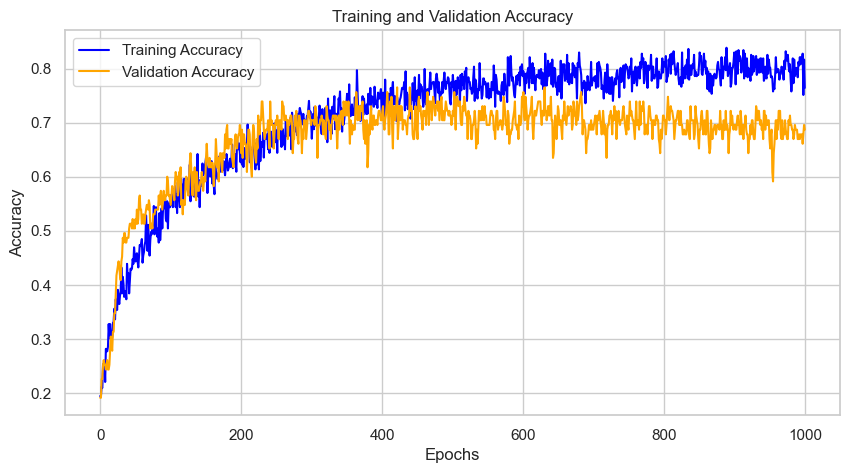

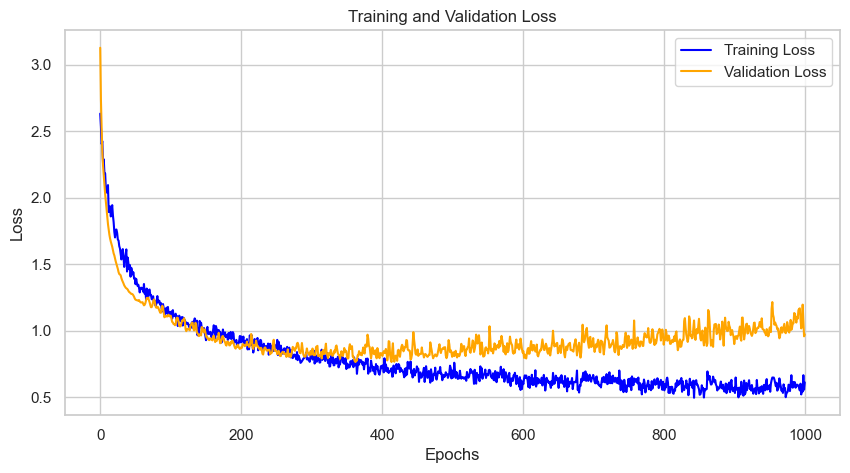

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
y_pred = model.predict(X_test, verbose=0)

In [140]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [141]:
y_pred_discrete

array([4, 0, 4, 3, 3, 3, 0, 1, 3, 4, 3, 0, 3, 0, 3, 0, 4, 2, 2, 4, 1, 3,
       1, 4, 0, 1, 4, 0, 0, 0, 4, 4, 4, 3, 4, 2, 3, 2, 1, 3, 1, 3, 2, 3,
       4, 4, 3, 4, 4, 4, 0, 2, 0, 1, 3, 4, 1, 4, 3, 4, 4, 3, 3, 4, 0, 3,
       2, 2, 2, 3, 3, 4, 2, 0, 4, 3, 0, 1, 2, 2, 2, 1, 1, 2, 0, 4, 1, 3,
       2, 2, 1, 0, 4, 3, 4, 1, 1, 3, 4, 1, 3, 3, 0, 4, 2, 4, 1, 3, 4, 2,
       3, 0, 0, 0, 4, 3, 4, 2, 2, 2, 1, 3, 3, 2, 1, 4, 3, 4, 0, 2, 2, 4,
       2, 4, 4, 2, 0, 1, 3, 1, 0, 4, 0, 2])

In [142]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [143]:
predictions_df1 = pd.DataFrame({'M1 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df1, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M1 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M1 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,3.0,3.0
...,...,...,...
139,Seth Curry,1.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [144]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M1 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy1 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy1)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.6736111111111112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81        28
         1.0       0.52      0.42      0.47        26
         2.0       0.81      0.73      0.77        30
         3.0       0.53      0.67      0.59        27
         4.0       0.66      0.76      0.70        33

    accuracy                           0.67       144
   macro avg       0.68      0.67      0.67       144
weighted avg       0.68      0.67      0.67       144



## Model Two (More Layers)

In [145]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
# Building a more complex model
model = Sequential([
    Dense(200, activation='relu', input_dim=57),
    BatchNormalization(),
    Dropout(0.5),
    Dense(175, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(150, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 200)               11600     
                                                                 
 batch_normalization_12 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_66 (Dense)            (None, 175)               35175     
                                                                 
 batch_normalization_13 (Bat  (None, 175)              700       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 175)             

In [147]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.8483 - accuracy: 0.6223
Training Loss: 0.848335325717926
Training Accuracy: 0.6222707629203796
5/5 [==============================] - 0s 2ms/step - loss: 0.9637 - accuracy: 0.5764
Validation Loss: 0.9636779427528381
Validation Accuracy: 0.5763888955116272 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.8166
Training Loss: 0.5438274145126343
Training Accuracy: 0.8165938854217529
5/5 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.6806
Validation Loss: 0.8074609041213989
Validation Accuracy: 0.6805555820465088 

Step :  500 / 1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.9127
Training Loss: 0.30670613050460815
Training Accuracy: 0.9126637578010559
5/5 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.6944
Validation Loss: 0.8738784193992615
Validation Accuracy: 

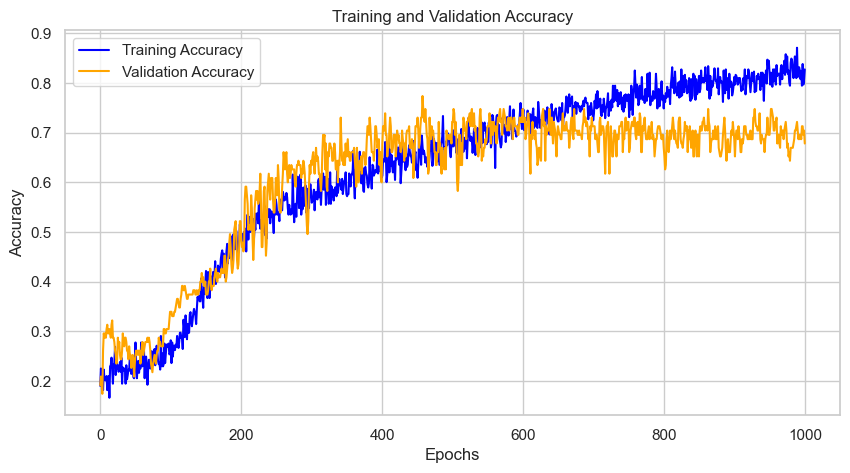

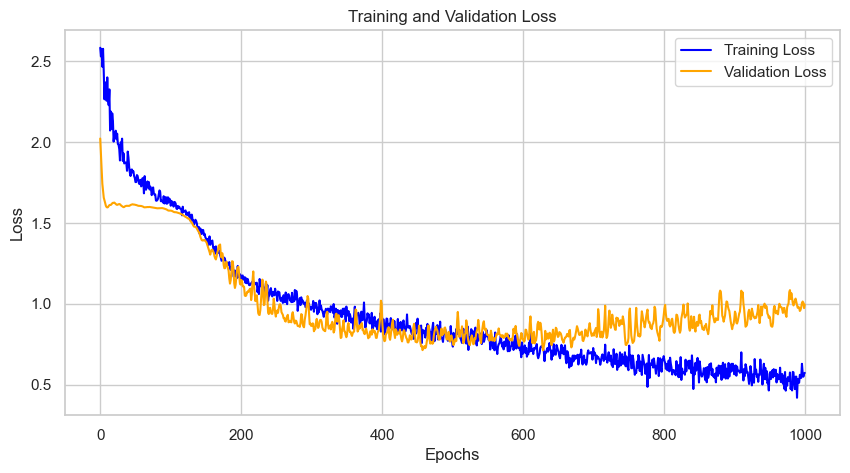

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
y_pred = model.predict(X_test, verbose=0)

In [150]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [151]:
y_pred_discrete

array([4, 0, 4, 3, 1, 3, 0, 1, 3, 4, 3, 0, 3, 0, 1, 0, 2, 2, 2, 4, 1, 3,
       1, 4, 0, 1, 4, 0, 0, 0, 4, 2, 4, 3, 4, 2, 1, 2, 3, 3, 0, 3, 2, 0,
       4, 4, 3, 4, 4, 3, 0, 2, 0, 0, 3, 4, 0, 2, 4, 4, 2, 1, 3, 4, 0, 3,
       2, 2, 2, 1, 3, 4, 2, 0, 4, 3, 3, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 3,
       3, 4, 0, 0, 4, 3, 4, 0, 0, 3, 2, 1, 3, 3, 0, 4, 2, 4, 1, 1, 2, 2,
       3, 0, 0, 0, 4, 3, 4, 2, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 0, 2, 3, 4,
       4, 4, 4, 2, 0, 1, 4, 0, 0, 2, 0, 2])

In [152]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [153]:
predictions_df2 = pd.DataFrame({'M2 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df2, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M2 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M2 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,1.0,3.0
...,...,...,...
139,Seth Curry,0.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,2.0,4.0
142,Anthony Davis,0.0,0.0


In [154]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M2 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy2 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy2)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.6805555555555556
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.62      0.38      0.48        26
         2.0       0.78      0.83      0.81        30
         3.0       0.48      0.56      0.52        27
         4.0       0.71      0.67      0.69        33

    accuracy                           0.68       144
   macro avg       0.67      0.67      0.67       144
weighted avg       0.68      0.68      0.67       144



## Model Three (Different Optimizer)

In [155]:
# Features for the model (excluding player positions and other identifiers)
features = [col for col in merged_data.columns if '_2022' in col and not col.startswith('Pos_') and col not in ['Player', 'Rk_2022']]

# Target columns are the one-hot encoded position columns for 2021
target_columns = [col for col in merged_data.columns if col.startswith('Pos_') and col.endswith('_2022')]

# Splitting the data
X = merged_data[features]
y = merged_data[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [156]:
model = Sequential([
    Dense(64, activation='relu', input_dim=57, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5-class classification
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                3712      
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_19 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 32)              

In [157]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
loss_hist =np.array([])
val_loss_hist =np.array([])
acc_hist =np.array([])
val_acc_hist =np.array([])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0,validation_data=(X_val, y_val))
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train)
    print("Training Loss:", score[0])
    print("Training Accuracy:", score[1])
    score = model.evaluate(X_test, y_test)
    print("Validation Loss:", score[0])
    print("Validation Accuracy:", score[1], "\n")
    loss_hist = np.concatenate((loss_hist, np.array(history.history['loss'])), axis = 0)
    acc_hist = np.concatenate((acc_hist, np.array(history.history['accuracy'])), axis = 0)
    val_acc_hist = np.concatenate((val_acc_hist, np.array(history.history['val_accuracy'])), axis = 0)
    val_loss_hist = np.concatenate((val_loss_hist, np.array(history.history['val_loss'])), axis = 0)

Step :  0 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1390 - accuracy: 0.5655
Training Loss: 1.1390063762664795
Training Accuracy: 0.5655021667480469
5/5 [==============================] - 0s 2ms/step - loss: 1.2317 - accuracy: 0.4861
Validation Loss: 1.2316792011260986
Validation Accuracy: 0.4861111044883728 

Step :  250 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1073 - accuracy: 0.5655
Training Loss: 1.107287049293518
Training Accuracy: 0.5655021667480469
5/5 [==============================] - 0s 2ms/step - loss: 1.1863 - accuracy: 0.4931
Validation Loss: 1.1863365173339844
Validation Accuracy: 0.4930555522441864 

Step :  500 / 1000
15/15 [==============================] - 0s 1ms/step - loss: 1.0308 - accuracy: 0.6114
Training Loss: 1.0307989120483398
Training Accuracy: 0.6113536953926086
5/5 [==============================] - 0s 1ms/step - loss: 1.1522 - accuracy: 0.5139
Validation Loss: 1.1522310972213745
Validation Accuracy: 0

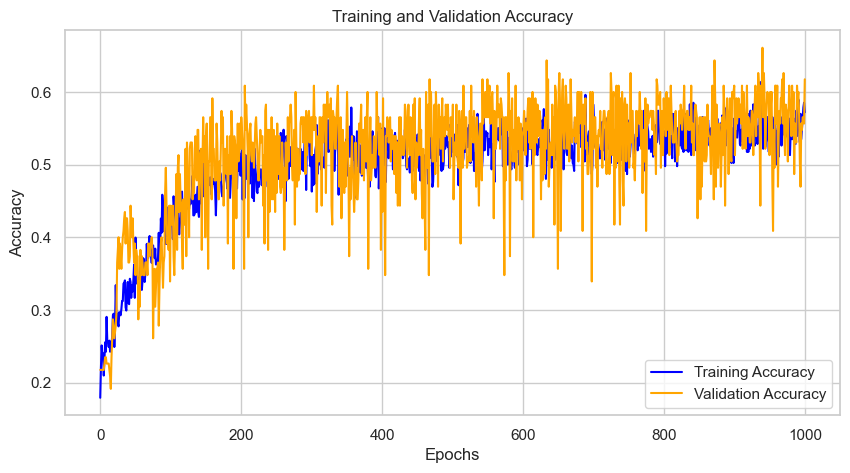

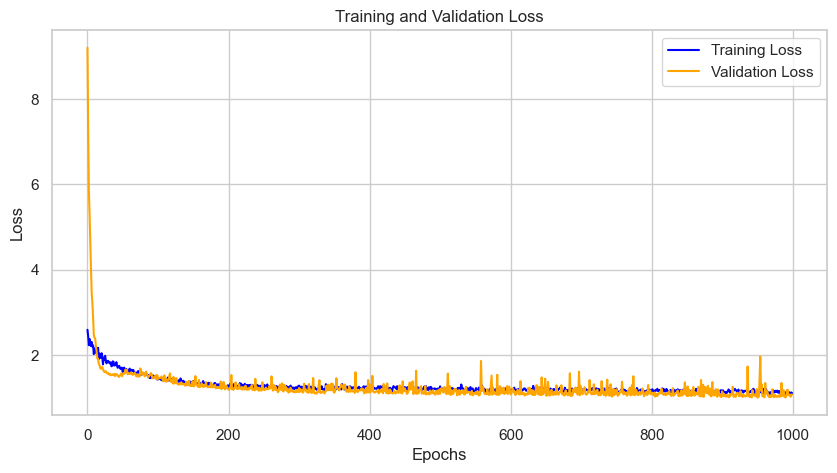

In [158]:
plt.figure(figsize=(10, 5))
plt.plot(acc_hist, label='Training Accuracy', color='blue')
plt.plot(val_acc_hist, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
y_pred = model.predict(X_test, verbose=0)

In [160]:
y_pred_discrete = np.argmax(y_pred, axis=1) 

In [161]:
y_pred_discrete

array([4, 0, 4, 3, 4, 3, 0, 1, 1, 4, 3, 0, 4, 0, 3, 0, 4, 2, 2, 4, 4, 3,
       1, 4, 0, 1, 4, 0, 3, 0, 4, 4, 4, 1, 4, 4, 3, 4, 0, 3, 3, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 0, 4, 0, 3, 4, 4, 0, 4, 3, 4, 4, 3, 3, 4, 0, 1,
       4, 4, 4, 3, 4, 4, 4, 0, 4, 3, 3, 3, 2, 4, 2, 3, 0, 4, 0, 4, 1, 4,
       4, 4, 0, 0, 4, 0, 4, 0, 0, 1, 4, 1, 4, 3, 0, 4, 4, 4, 1, 1, 4, 2,
       3, 0, 0, 0, 4, 3, 3, 2, 4, 2, 3, 4, 4, 4, 1, 1, 1, 4, 0, 4, 4, 4,
       4, 4, 4, 2, 0, 0, 3, 3, 0, 4, 0, 2])

In [162]:
y_test_indices = y_test.dot(y_test.columns)

# Define a mapping dictionary to match the label encoding in your array
position_mapping = {'Pos_C_2022': 0, 'Pos_PF_2022': 1, 'Pos_PG_2022': 2, 'Pos_SF_2022': 3, 'Pos_SG_2022': 4}

# Map the position indices using the mapping dictionary
y_test_mapped = y_test_indices.map(position_mapping)

In [163]:
predictions_df3 = pd.DataFrame({'M3 - Predicted_POS_2022': y_pred_discrete.flatten()})
true_values_df = pd.DataFrame({'True_POS_2022': y_test_mapped.values})
comparison_df = pd.concat([predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
filtered_df = comparison_df.dropna(subset=['M3 - Predicted_POS_2022', 'True_POS_2022'])
filtered_df

,Player,M3 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0
1,Steven Adams,0.0,0.0
2,Bam Adebayo,4.0,4.0
3,Santi Aldama,3.0,3.0
4,Nickeil Alexander-Walker,4.0,3.0
...,...,...,...
139,Seth Curry,3.0,3.0
140,Seth Curry,0.0,0.0
141,Stephen Curry,4.0,4.0
142,Anthony Davis,0.0,0.0


In [164]:
# Extract predicted and true positions from the filtered DataFrame
y_pred = filtered_df['M3 - Predicted_POS_2022']
y_true = filtered_df['True_POS_2022']

# Compute accuracy score
accuracy3 = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy3)

# Compute other evaluation metrics (e.g., classification report)
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.5625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        28
         1.0       0.57      0.31      0.40        26
         2.0       1.00      0.30      0.46        30
         3.0       0.42      0.41      0.42        27
         4.0       0.45      0.88      0.59        33

    accuracy                           0.56       144
   macro avg       0.65      0.55      0.54       144
weighted avg       0.65      0.56      0.54       144



## Model Comparison

In [165]:
comparison_df = pd.concat([predictions_df1,predictions_df2,predictions_df3, true_values_df], axis=1)

player_info_df = merged_data[['Player']] 
comparison_df = pd.concat([player_info_df, comparison_df], axis=1)
# Display the comparison DataFrame
comparison_df


,Player,M1 - Predicted_POS_2022,M2 - Predicted_POS_2022,M3 - Predicted_POS_2022,True_POS_2022
0,Precious Achiuwa,4.0,4.0,4.0,4.0
1,Steven Adams,0.0,0.0,0.0,0.0
2,Bam Adebayo,4.0,4.0,4.0,4.0
3,Santi Aldama,3.0,3.0,3.0,3.0
4,Nickeil Alexander-Walker,3.0,1.0,4.0,3.0
...,...,...,...,...,...
712,Thaddeus Young,NaN,NaN,NaN,NaN
713,Trae Young,NaN,NaN,NaN,NaN
714,Omer Yurtseven,NaN,NaN,NaN,NaN
715,Cody Zeller,NaN,NaN,NaN,NaN


In [166]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['One (3 Layers)', 'Two (More Layers)', 'Three (SGD Optimizer)'],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
})

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)

Comparison of Models:
                   Model  Accuracy
0         One (3 Layers)  0.673611
1      Two (More Layers)  0.680556
2  Three (SGD Optimizer)  0.562500
